In [ ]:
# # 1. 나눔 폰트 설치 명령어
# !sudo apt-get install -y fonts-nanum > /dev/null
# !sudo fc-cache -fv
# !rm -rf ~/.cache/matplotlib

# # 2. 런타임 재시작 (이 메시지를 본 후 직접 실행)
# print("❌ 폰트 변경을 위해 [런타임] -> [런타임 다시 시작]을 클릭하세요. 재시작 후 다음 코드 블록을 실행하세요.")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

# 데이터불러오기

In [ ]:
''' 데이터불러오기'''

import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import os

# ==============================================================================
# 0. 환경 설정 및 파일 로드 (Google Drive 경로)
# ==============================================================================
DRIVE_PATH = '/content/drive/MyDrive/bigcon/data/raw/'
FILE_1_MASTER = os.path.join(DRIVE_PATH, "big_data_set1_f.csv")
FILE_2_PERF = os.path.join(DRIVE_PATH, "big_data_set2_f.csv")
FILE_3_CUST = os.path.join(DRIVE_PATH, "big_data_set3_f.csv")
GEOCODED_FILE = os.path.join(DRIVE_PATH, "df_geocoded.csv")
# FILE_1_PRE = os.path.join(DRIVE_PATH, "df1_pre.csv")
MACRO_FILE = os.path.join(DRIVE_PATH, "macro_data_combined_final.csv")
# Preprocessing=os.path.join(DRIVE_PATH,"df_Preprocessing.csv")


# MISSING_VALUE_CODE = -999999.9
# LAG_PERIOD = 3
# PREDICTION_WINDOW_MONTHS = 5
# SALES_DROP_THRESHOLD = -0.15 # 매출 급락 기준: 전월 대비 10% 하락

# 데이터 로드
try:
    df1_org = pd.read_csv(FILE_1_MASTER, encoding='cp949')
    df2_org = pd.read_csv(FILE_2_PERF, encoding='cp949')
    df3_org= pd.read_csv(FILE_3_CUST, encoding='cp949')
    df_geocoded_org = pd.read_csv(GEOCODED_FILE, encoding='utf8', index_col=0)
    # df1_pre_org= pd.read_csv(FILE_1_PRE, encoding='cp949')
    combined_macro_df = pd.read_csv(MACRO_FILE, encoding='utf8')
    # df_preprocessing=pd.read_csv(Preprocessing, encoding='utf8')
except Exception as e:
    raise RuntimeError(f"❌ 파일 로드 실패: {e}")

# data copy 생성
df1=df1_org.copy()
df2=df2_org.copy()
df3=df3_org.copy()
combined_macro_df=combined_macro_df.copy()
# df=df_preprocessing.copy()
df_geocoded = df_geocoded_org.copy()
# df1_pre = df1_pre_org.copy()


# ----------------------------------------------------
# 1. '가맹점지역' 컬럼 제거
# ----------------------------------------------------
# df1 = df1.drop(columns=['MCT_SIGUNGU_NM'])
# df_geocoded = df_geocoded.drop(columns=['MCT_SIGUNGU_NM'])
# print("✅ 'MCT_SIGUNGU_NM:가맹점지역' 컬럼 제거 완료.")

# df1 전처리

## 지오코딩

카카오 API로 지오코딩하고 안된거는 따로 처리

In [ ]:
df1.info()
df_geocoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4185 non-null   object 
 1   MCT_BSE_AR          4185 non-null   object 
 2   MCT_NM              4185 non-null   object 
 3   MCT_BRD_NUM         542 non-null    object 
 4   MCT_SIGUNGU_NM      4185 non-null   object 
 5   HPSN_MCT_ZCD_NM     4185 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3138 non-null   object 
 7   ARE_D               4185 non-null   int64  
 8   MCT_ME_D            127 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4170 entries, 0 to 4169
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4170 non-null   object 
 1   MCT_BSE_AR          4170 non-null   o

In [ ]:
# 타입 일치 (혹시 모를 오류 방지)
df1['ENCODED_MCT'] = df1['ENCODED_MCT'].astype(str)
df_geocoded['ENCODED_MCT'] = df_geocoded['ENCODED_MCT'].astype(str)

# 필요한 컬럼만 선택해서 left join
df_merged = df1.merge(
    df_geocoded[['ENCODED_MCT', 'LAT', 'LNG']],
    on='ENCODED_MCT',
    how='left'
)

# 결과 확인
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4185 non-null   object 
 1   MCT_BSE_AR          4185 non-null   object 
 2   MCT_NM              4185 non-null   object 
 3   MCT_BRD_NUM         542 non-null    object 
 4   MCT_SIGUNGU_NM      4185 non-null   object 
 5   HPSN_MCT_ZCD_NM     4185 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3138 non-null   object 
 7   ARE_D               4185 non-null   int64  
 8   MCT_ME_D            127 non-null    float64
 9   LAT                 4170 non-null   float64
 10  LNG                 4170 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 359.8+ KB
None


In [ ]:
# LAT가 결측치인 행만 필터링
df_missing_lat = df_merged[df_merged['LAT'].isna()]

# 결과 확인
print(df_missing_lat.info())
df_missing_lat.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 114 to 4153
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         15 non-null     object 
 1   MCT_BSE_AR          15 non-null     object 
 2   MCT_NM              15 non-null     object 
 3   MCT_BRD_NUM         1 non-null      object 
 4   MCT_SIGUNGU_NM      15 non-null     object 
 5   HPSN_MCT_ZCD_NM     15 non-null     object 
 6   HPSN_MCT_BZN_CD_NM  8 non-null      object 
 7   ARE_D               15 non-null     int64  
 8   MCT_ME_D            1 non-null      float64
 9   LAT                 0 non-null      float64
 10  LNG                 0 non-null      float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.4+ KB
None


,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,LAT,LNG
114,C64FD46BFC,서울 성동구 행당로 38,덕흥***,NaN,서울 성동구,축산물,NaN,20001012,NaN,NaN,NaN
170,05992E2BE5,서울 성동구 매봉길 13.,락앤*****,중식당1,서울 성동구,중식당,NaN,20140507,NaN,NaN,NaN
557,862A6A9582,서울 성동구 천호대로 276,일인**,NaN,서울 성동구,한식-단품요리일반,답십리,20130212,NaN,NaN,NaN
786,622D27CE49,서울 성동구 용답중앙길 12,대광**,NaN,서울 성동구,미곡상,답십리,20050411,NaN,NaN,NaN
949,EED0404EC2,서울 성동구 왕십리로30길 8,자연*****,NaN,서울 성동구,농산물,NaN,20160504,NaN,NaN,NaN


In [ ]:
import time
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from tqdm.notebook import tqdm

# ==========================================================
# 1. LAT 결측 행 추출
# ==========================================================
df_missing_lat = df_merged[df_merged['LAT'].isna()].copy()

# ==========================================================
# 2. 특정 주소 수정 (나머지는 그대로 둠)
# ==========================================================
target_mct = '891AEAE4A4'
new_address = '서울 성동구 왕십리로 26길 2-1.'  # 띄어쓰기 보정

df_missing_lat.loc[df_missing_lat['ENCODED_MCT'] == target_mct, 'MCT_BSE_AR'] = new_address
df_missing_lat.loc[df_missing_lat['ENCODED_MCT'] == target_mct, ['LAT', 'LNG']] = np.nan

print(f"✅ 주소 수정 완료: {target_mct} → {new_address}")

# ==========================================================
# 3. Nominatim 지오코딩 함수 정의
# ==========================================================
geolocator = Nominatim(user_agent="data_analysis_geocoding_pass", timeout=10)

def geocode_address(address):
    try:
        location = geolocator.geocode(address, language='ko', country_codes='KR')
        time.sleep(1.1)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except Exception:
        time.sleep(1.1)
        return np.nan, np.nan

# ==========================================================
# 4. 모든 행(수정된 주소 포함)에 대해 지오코딩 실행
# ==========================================================
tqdm.pandas(desc="Geocoding in progress")
df_missing_lat[['LAT', 'LNG']] = df_missing_lat['MCT_BSE_AR'].progress_apply(
    lambda addr: pd.Series(geocode_address(addr))
)

# ==========================================================
# 5. 결과 출력
# ==========================================================
print("\n========================")
print("🗺️ 지오코딩 결과 미리보기")
print("========================")

result_cols = ['ENCODED_MCT', 'MCT_BSE_AR', 'MCT_NM', 'MCT_SIGUNGU_NM', 'LAT', 'LNG']
print(df_missing_lat[result_cols].head(15).to_markdown(index=False, floatfmt=(".6f", ".6f")))

success = df_missing_lat['LAT'].notna().sum()
total = len(df_missing_lat)
print(f"\n✅ 지오코딩 성공: {success} / {total} 건")


✅ 주소 수정 완료: 891AEAE4A4 → 서울 성동구 왕십리로 26길 2-1.


Geocoding in progress:   0%|          | 0/15 [00:00<?, ?it/s]


🗺️ 지오코딩 결과 미리보기
| ENCODED_MCT   | MCT_BSE_AR                            | MCT_NM       | MCT_SIGUNGU_NM   |     LAT |     LNG |
|:--------------|:--------------------------------------|:-------------|:-----------------|--------:|--------:|
| C64FD46BFC    | 서울 성동구 행당로 38                 | 덕흥***      | 서울 성동구      | 37.558  | 127.032 |
| 05992E2BE5    | 서울 성동구 매봉길 13.                | 락앤*****    | 서울 성동구      | 37.5478 | 127.012 |
| 862A6A9582    | 서울 성동구 천호대로 276              | 일인**       | 서울 성동구      | 37.5605 | 127.068 |
| 622D27CE49    | 서울 성동구 용답중앙길 12             | 대광**       | 서울 성동구      | 37.5639 | 127.052 |
| EED0404EC2    | 서울 성동구 왕십리로30길 8            | 자연*****    | 서울 성동구      | 37.5656 | 127.031 |
| 891AEAE4A4    | 서울 성동구 왕십리로 26길 2-1.        | 안주****     | 서울 성동구      | 37.5647 | 127.033 |
| A4D5BDDEDF    | 서울 성동구 자동차시장1길 82.         | 제일**       | 서울 성동구      | 37.5595 | 127.067 |
| 202F736EBC    | 서울 성동구 자동차시장1길 90.         | 화목***      | 서울 성동구      | 37.5595 | 127.06

In [ ]:
coords = {
    'C64FD46BFC': (37.5554, 127.022),
    '05992E2BE5': (37.5465, 127.013),
    '862A6A9582': (37.5719, 127.044),
    '622D27CE49': (37.5639, 127.052),
    'EED0404EC2': (37.5656, 127.031),
    '891AEAE4A4': (37.5647, 127.033),
    'A4D5BDDEDF': (37.5603, 127.067),
    '202F736EBC': (37.5603, 127.067),
    'DA7C0F3255': (37.5643, 127.034),
    '2402B1EA00': (37.5603, 127.067),
    'E2BDC284DA': (37.5630, 127.053),
    '58168DBBE0': (37.5630, 127.053),
    '844C36220E': (37.5639, 127.052),
    'CECDA06CB5': (37.5653, 127.043),
    'DF67DE190B': (37.5640, 127.029)
}

for mct, (lat, lng) in coords.items():
    df_merged.loc[df_merged['ENCODED_MCT'] == mct, ['LAT', 'LNG']] = [lat, lng]


In [ ]:
print("LAT/LNG NaN after fill:")
print(df_merged[['LAT','LNG']].isna().sum())

df_merged.info()

LAT/LNG NaN after fill:
LAT    0
LNG    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4185 non-null   object 
 1   MCT_BSE_AR          4185 non-null   object 
 2   MCT_NM              4185 non-null   object 
 3   MCT_BRD_NUM         542 non-null    object 
 4   MCT_SIGUNGU_NM      4185 non-null   object 
 5   HPSN_MCT_ZCD_NM     4185 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3138 non-null   object 
 7   ARE_D               4185 non-null   int64  
 8   MCT_ME_D            127 non-null    float64
 9   LAT                 4185 non-null   float64
 10  LNG                 4185 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 359.8+ KB


## 상권전처리

In [ ]:
df1_geo_final=df_merged.copy()

In [ ]:
''' 컬럼명 한국어로 바꾸기'''

# data copy 생성
# df1=df1_org.copy()
# df2=df2_org.copy()
# df3=df3_org.copy()

# 컬럼 한국어로 mapping 할 수 있는 딕셔너리 생성
column_name_mapping = {
    # ============================================
    # 1. 기존에 제공했던 마스터/일반 정보 컬럼
    # ============================================
    'ENCODED_MCT': '가맹점구분번호',
    'MCT_BSE_AR': '가맹점주소',
    'MCT_NM': '가맹점명',
    'MCT_BRD_NUM': '브랜드구분코드',
    'MCT_SIGUNGU_NM': '가맹점지역',
    'HPSN_MCT_ZCD_NM': '업종',
    'HPSN_MCT_BZN_CD_NM': '상권',
    'ARE_D': '개설일',
    'MCT_ME_D': '폐업일',
    'TA_YM': '기준년월',
    'MCT_OPE_MS_CN': '가맹점 운영개월수 구간',
    'RC_M1_SAA': '매출금액 구간',
    'RC_M1_TO_UE_CT': '매출건수 구간',
    'RC_M1_UE_CUS_CN': '유니크 고객 수 구간',
    'RC_M1_AV_NP_AT': '객단가 구간',
    'APV_CE_RAT': '취소율 구간',
    'DLV_SAA_RAT': '배달매출금액 비율',
    'M1_SME_RY_SAA_RAT': '동일 업종 매출금액 비율',
    'M1_SME_RY_CNT_RAT': '동일 업종 매출건수 비율',
    'M12_SME_RY_SAA_PCE_RT': '동일 업종 내 매출 순위 비율',
    'M12_SME_BZN_SAA_PCE_RT': '동일 상권 내 매출 순위 비율',
    'M12_SME_RY_ME_MCT_RAT': '동일 업종 내 해지 가맹점 비중',
    'M12_SME_BZN_ME_MCT_RAT': '동일 상권 내 해지 가맹점 비중',

    # ============================================
    # 2. 새로 추가된 고객/이용 패턴 관련 컬럼
    # ============================================
    # 고객 성별/연령대 비중
    'M12_MAL_1020_RAT': '남성 20대이하 고객 비중',
    'M12_MAL_30_RAT': '남성 30대 고객 비중',
    'M12_MAL_40_RAT': '남성 40대 고객 비중',
    'M12_MAL_50_RAT': '남성 50대 고객 비중',
    'M12_MAL_60_RAT': '남성 60대이상 고객 비중',
    'M12_FME_1020_RAT': '여성 20대이하 고객 비중',
    'M12_FME_30_RAT': '여성 30대 고객 비중',
    'M12_FME_40_RAT': '여성 40대 고객 비중',
    'M12_FME_50_RAT': '여성 50대 고객 비중',
    'M12_FME_60_RAT': '여성 60대이상 고객 비중',

    # 고객 유형 및 재방문
    'MCT_UE_CLN_REU_RAT': '재방문 고객 비중',
    'MCT_UE_CLN_NEW_RAT': '신규 고객 비중',

    # 고객 이용 목적 (거주/직장/유동)
    'RC_M1_SHC_RSD_UE_CLN_RAT': '거주 이용 고객 비율',
    'RC_M1_SHC_WP_UE_CLN_RAT': '직장 이용 고객 비율',
    'RC_M1_SHC_FLP_UE_CLN_RAT': '유동인구 이용 고객 비율'
}

# 컬럼이름 한국어로 바꾸기
# df1.rename(columns=column_name_mapping, inplace=True)
# df2.rename(columns=column_name_mapping, inplace=True)
df1_geo_final.rename(columns=column_name_mapping, inplace=True)

In [ ]:
df1_geo_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 
 4   가맹점지역    4185 non-null   object 
 5   업종       4185 non-null   object 
 6   상권       3138 non-null   object 
 7   개설일      4185 non-null   int64  
 8   폐업일      127 non-null    float64
 9   LAT      4185 non-null   float64
 10  LNG      4185 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 359.8+ KB


In [ ]:
import numpy as np
import pandas as pd

# -------------------------------
# 0) 설정 & 원본 보존
# -------------------------------
ID_COL   = '가맹점구분번호'
BZN_COL  = '상권'
LAT_COL  = 'LAT'
LNG_COL  = 'LNG'

K = 5                      # 이웃 개수
MAX_RADIUS_KM = 1.2        # 이웃 최대 반경(킬로미터). 너무 먼 이웃은 배제
FALLBACK_LABEL = '상권_유추실패'

df = df1_geo_final.copy()

# -------------------------------
# 1) 간단 표준화 (공백/이상치 정리)
# -------------------------------
def normalize_bzn(x):
    if pd.isna(x): return np.nan
    x = str(x).strip()
    if x in ['', 'nan', 'None', 'NULL']:  # 의미 없는 표기들 NaN 처리
        return np.nan
    return x

df[BZN_COL] = df[BZN_COL].apply(normalize_bzn)

# -------------------------------
# 2) known / missing 분리
# -------------------------------
known = df.dropna(subset=[BZN_COL, LAT_COL, LNG_COL]).reset_index(drop=True)
missing = df[df[BZN_COL].isna()].dropna(subset=[LAT_COL, LNG_COL]).reset_index()

print(f"[info] 상권이 있는 행: {len(known)} / 결측(좌표 보유): {len(missing)}")

if len(missing) == 0:
    print("[done] 채울 결측이 없습니다.")
else:
    # -------------------------------
    # 3) Haversine KNN (sklearn 우선, 실패 시 numpy fallback)
    # -------------------------------
    def to_rad(a): return np.radians(a)
    R = 6371.0088  # 지구 반지름(km)

    used_sklearn = False
    try:
        from sklearn.neighbors import NearestNeighbors
        used_sklearn = True
        # 좌표(위도, 경도)를 라디안으로 변환
        known_rad = np.radians(known[[LAT_COL, LNG_COL]].values)
        missing_rad = np.radians(missing[[LAT_COL, LNG_COL]].values)

        n_neighbors = min(K, len(known))
        nn = NearestNeighbors(
            n_neighbors=n_neighbors,
            algorithm='ball_tree',
            metric='haversine'
        ).fit(known_rad)
        dist_rad, idxs = nn.kneighbors(missing_rad)
        dist_km = dist_rad * R  # 라디안 → km
    except Exception as e:
        print(f"[warn] sklearn NearestNeighbors 사용 불가, numpy fallback로 진행합니다. ({e})")
        used_sklearn = False
        # numpy 브루트포스(4185 규모면 충분히 돌아갑니다)
        known_rad = np.radians(known[[LAT_COL, LNG_COL]].values)
        missing_rad = np.radians(missing[[LAT_COL, LNG_COL]].values)

        # haversine 거리 계산 함수 (vectorized)
        def haversine_batch(A, B):
            # A: (m,2), B: (n,2)
            lat1 = A[:, [0]]
            lon1 = A[:, [1]]
            lat2 = B[:, 0]
            lon2 = B[:, 1]
            dlat = lat2 - lat1
            dlon = lon2 - lon1
            a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
            c = 2 * np.arcsin(np.sqrt(a))
            return c  # 라디안 거리 (m x n)

        # (m x n) 큰 행렬이 부담되면 배치로
        batch = 512
        dist_rad_list = []
        for s in range(0, len(missing_rad), batch):
            e = s + batch
            d = haversine_batch(missing_rad[s:e], known_rad)  # (batch, n_known)
            dist_rad_list.append(d)
        dist_rad_full = np.vstack(dist_rad_list)
        dist_km_full = dist_rad_full * R

        # 각 missing 행에 대해 K개 최단 이웃 index/거리 확보
        idxs = np.argpartition(dist_km_full, kth=min(K, len(known)-1), axis=1)[:, :min(K, len(known))]
        # argpartition 결과를 실제 거리 기준 정렬
        row_idx = np.arange(len(missing_rad))[:, None]
        dsel = dist_km_full[row_idx, idxs]
        order = np.argsort(dsel, axis=1)
        idxs = idxs[row_idx, order]
        dist_km = dsel[row_idx, order]

    # -------------------------------
    # 4) 거리-가중 최빈값으로 상권 결정
    # -------------------------------
    labels_known = known[BZN_COL].values

    def weighted_mode(nei_labels, nei_dists_km):
        # 반경 필터
        mask = (nei_dists_km <= MAX_RADIUS_KM)
        if not np.any(mask):
            return FALLBACK_LABEL
        labs = nei_labels[mask]
        dists = nei_dists_km[mask]
        # 0거리 방지용 epsilon
        w = 1.0 / (dists + 1e-6)

        # 라벨별 가중치 합
        uniq, inv = np.unique(labs, return_inverse=True)
        wsum = np.zeros_like(uniq, dtype=float)
        # 각 라벨 가중치 합산
        for i, lab_idx in enumerate(inv):
            wsum[lab_idx] += w[i]
        # 최대 가중치 라벨 선택
        return uniq[np.argmax(wsum)]

    imputed = []
    for i in range(len(missing)):
        nei_idx = idxs[i]
        nei_dist = dist_km[i]
        nei_labels = labels_known[nei_idx]
        imputed_label = weighted_mode(nei_labels, nei_dist)
        imputed.append(imputed_label)

    # -------------------------------
    # 5) 원본 df에 값 반영
    # -------------------------------
    imputed_series = pd.Series(imputed, index=missing['index'])  # 원래 df의 인덱스와 매칭
    df.loc[imputed_series.index, BZN_COL] = imputed_series

    # 못 채운 값은 기본 레이블로
    df[BZN_COL] = df[BZN_COL].fillna(FALLBACK_LABEL)

    # -------------------------------
    # 6) 결과 요약
    # -------------------------------
    print("\n--- 상권 KNN Imputation 결과 ---")
    print(df[BZN_COL].value_counts().head(10))
    print(f"\n최종 '상권' 결측치 수: {df[BZN_COL].isna().sum()}개 (should be 0)")

# 필요하면 최종 결과를 df1_geo_final에 반영
df1_geo_final_imputed = df.copy()


[info] 상권이 있는 행: 3138 / 결측(좌표 보유): 1047

--- 상권 KNN Imputation 결과 ---
상권
성수      1042
왕십리      862
뚝섬       519
마장동      384
한양대      362
금남시장     335
답십리      185
옥수       146
행당       139
신금호      121
Name: count, dtype: int64

최종 '상권' 결측치 수: 0개 (should be 0)


In [ ]:
df1_geo_final.info() #상권 처리 이전
df1_geo_final_imputed.info() #상권 처리 이후

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 
 4   가맹점지역    4185 non-null   object 
 5   업종       4185 non-null   object 
 6   상권       3138 non-null   object 
 7   개설일      4185 non-null   int64  
 8   폐업일      127 non-null    float64
 9   LAT      4185 non-null   float64
 10  LNG      4185 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 359.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 


상권 전처리가 잘 되었는지 확인 및 시각화

1개 상권유추 실패:강남구 선릉로에 있어서 상권 유추가 잘 안된 듯

In [ ]:
df1_geo_final_imputed[df1_geo_final_imputed['상권'] == '상권_유추실패']

,가맹점구분번호,가맹점주소,가맹점명,브랜드구분코드,가맹점지역,업종,상권,개설일,폐업일,LAT,LNG
233,15E95AF364,서울 강남구 선릉로 711.,잭슨******,NaN,서울 성동구,피자,상권_유추실패,20211025,NaN,37.518398,127.040594


In [ ]:
# 결측치 개수 비교
print("🔍 상권 결측 개수")
print("Before:", df1_geo_final['상권'].isna().sum())
print("After :", df1_geo_final_imputed['상권'].isna().sum())
print(df1_geo_final['상권'].value_counts())

# 고유 상권 수 변화
print("\n🏙️ 고유 상권 수")
print("Before:", df1_geo_final['상권'].nunique())
print("After :", df1_geo_final_imputed['상권'].nunique())
print(df1_geo_final_imputed['상권'].value_counts())

# 유추 실패(‘상권_유추실패’) 비율
fail_rate = (df1_geo_final_imputed['상권'] == '상권_유추실패').mean()
print(f"\n⚠️ 상권_유추실패 비율: {fail_rate*100:.2f}%")


🔍 상권 결측 개수
Before: 1047
After : 0
상권
성수            762
왕십리           538
뚝섬            468
한양대           328
마장동           257
금남시장          249
답십리           179
옥수            121
신금호           100
행당             85
장한평자동차         41
서면역             1
건대입구            1
동대문역사문화공원역      1
압구정로데오          1
오남              1
화양시장            1
방배역             1
미아사거리           1
풍산지구            1
자양              1
Name: count, dtype: int64

🏙️ 고유 상권 수
Before: 21
After : 22
상권
성수            1042
왕십리            862
뚝섬             519
마장동            384
한양대            362
금남시장           335
답십리            185
옥수             146
행당             139
신금호            121
장한평자동차          65
자양               9
화양시장             7
상권_유추실패          1
건대입구             1
서면역              1
압구정로데오           1
동대문역사문화공원역       1
오남               1
방배역              1
미아사거리            1
풍산지구             1
Name: count, dtype: int64

⚠️ 상권_유추실패 비율: 0.02%


/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 50773 (\N{HANGUL SYLLABLE WANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 49901 (\N{HANGUL SYLLABLE SIB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 46749 (\N{HANGUL SYLLABLE DDUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1921454472.py:18: UserWarning: Glyph 49452 (\N{HANGUL SYLLABLE SEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layou

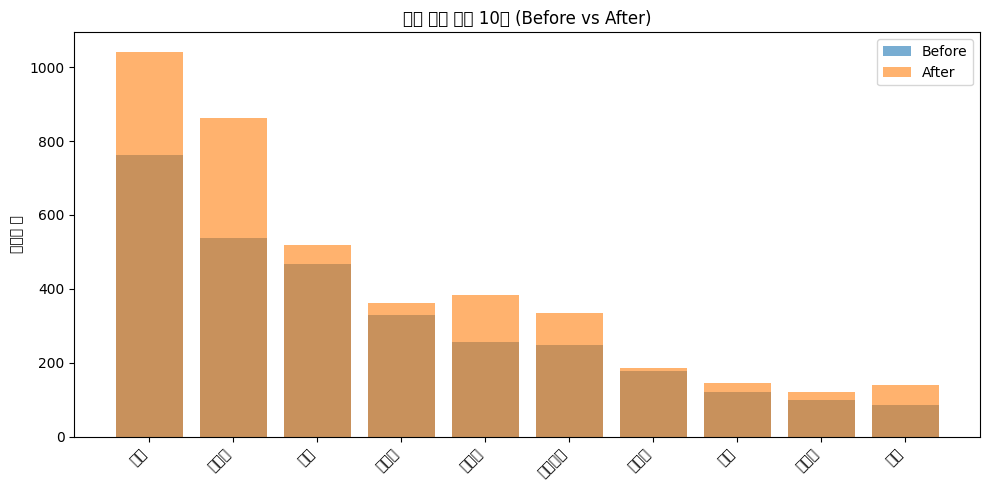

In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 적용
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

topN = 10
before_counts = df1_geo_final['상권'].value_counts().head(topN)
after_counts = df1_geo_final_imputed['상권'].value_counts().head(topN)

plt.figure(figsize=(10,5))
plt.bar(before_counts.index, before_counts.values, alpha=0.6, label='Before')
plt.bar(after_counts.index, after_counts.values, alpha=0.6, label='After')
plt.xticks(rotation=45, ha='right')
plt.ylabel("가맹점 수")
plt.title("상권 분포 상위 10개 (Before vs After)")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 50773 (\N{HANGUL SYLLABLE WANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 49901 (\N{HANGUL SYLLABLE SIB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 46749 (\N{HANGUL SYLLABLE DDUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516478778.py:14: UserWarning: Glyph 49452 (\N{HANGUL SYLLABLE SEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layou

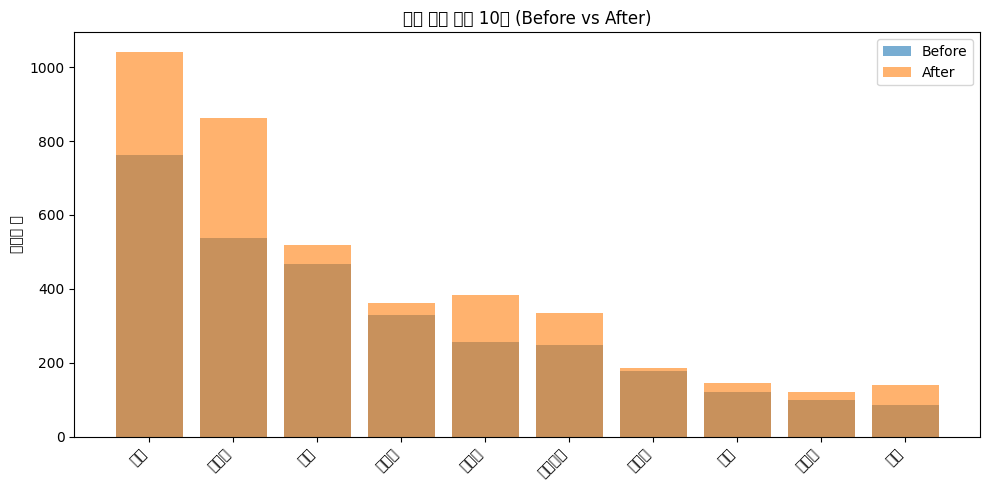

In [ ]:
import matplotlib.pyplot as plt

topN = 10
before_counts = df1_geo_final['상권'].value_counts().head(topN)
after_counts = df1_geo_final_imputed['상권'].value_counts().head(topN)

plt.figure(figsize=(10,5))
plt.bar(before_counts.index, before_counts.values, alpha=0.6, label='Before')
plt.bar(after_counts.index, after_counts.values, alpha=0.6, label='After')
plt.xticks(rotation=45, ha='right')
plt.ylabel("가맹점 수")
plt.title("상권 분포 상위 10개 (Before vs After)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 두 데이터프레임을 ID 기준으로 병합
compare_df = df1_geo_final[['가맹점구분번호','상권']].merge(
    df1_geo_final_imputed[['가맹점구분번호','상권']],
    on='가맹점구분번호',
    suffixes=('_before', '_after')
)

# 상권이 달라진 경우만 필터링
changed = compare_df[compare_df['상권_before'] != compare_df['상권_after']]

print(f"🏪 상권이 변경된 점포 수: {len(changed)}개")
display(changed.head(10))


🏪 상권이 변경된 점포 수: 1047개


,가맹점구분번호,상권_before,상권_after
6,9A71D71270,NaN,마장동
9,27C88660A5,NaN,장한평자동차
15,E863289A7D,NaN,왕십리
18,3E35A71757,NaN,마장동
19,5017C6924A,NaN,마장동
20,888828B4FB,NaN,마장동
21,06C463E9D9,NaN,마장동
22,5AEEA3B4EF,NaN,마장동
23,1400634946,NaN,마장동
24,3E61C339E2,NaN,마장동


In [ ]:
import folium

m = folium.Map(location=[37.56, 127.03], zoom_start=13)

# 결측이었던 점포 (빨간색)
for _, r in df1_geo_final[df1_geo_final['상권'].isna()].iterrows():
    folium.CircleMarker([r['LAT'], r['LNG']], radius=3, color='red', fill=True).add_to(m)

# 새로 채워진 점포 (파란색)
for _, r in changed.iterrows():
    lat = df1_geo_final_imputed.loc[df1_geo_final_imputed['가맹점구분번호'] == r['가맹점구분번호'], 'LAT'].values[0]
    lng = df1_geo_final_imputed.loc[df1_geo_final_imputed['가맹점구분번호'] == r['가맹점구분번호'], 'LNG'].values[0]
    folium.CircleMarker([lat, lng], radius=3, color='blue', fill=True).add_to(m)

m.save("상권_전후비교.html")
m


/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3227680551.py:74: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  plt.tight_lay

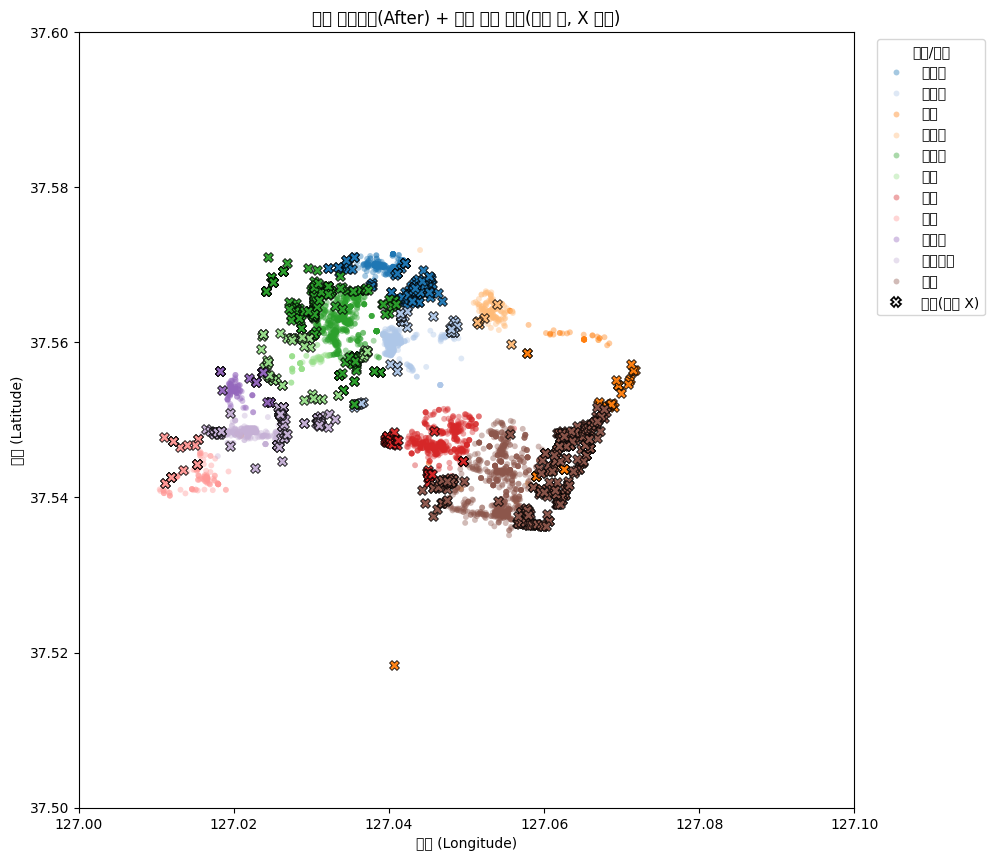

✅ 저장 완료: bizzone_clusters_changed_samecolor_X.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# 한글 폰트 설정 적용
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

df_before = df1_geo_final.copy()
df_after  = df1_geo_final_imputed.copy()

ID_COL, BZN_COL, LAT_COL, LNG_COL = '가맹점구분번호', '상권', 'LAT', 'LNG'
df_before = df_before.dropna(subset=[LAT_COL, LNG_COL])
df_after  = df_after.dropna(subset=[LAT_COL, LNG_COL])

# 전/후 상권 비교해 변경 여부 플래그
cmp = df_before[[ID_COL, BZN_COL]].merge(
    df_after[[ID_COL, BZN_COL]],
    on=ID_COL, how='inner', suffixes=('_before', '_after')
)
changed_ids = cmp[
    (cmp[f'{BZN_COL}_before'] != cmp[f'{BZN_COL}_after']) |
    (cmp[f'{BZN_COL}_before'].isna() & cmp[f'{BZN_COL}_after'].notna())
][ID_COL]
df_after['CHANGED'] = df_after[ID_COL].isin(changed_ids)

# 상위 N개 라벨 + 기타
TOP_N = 10
top_labels = df_after[BZN_COL].value_counts().head(TOP_N).index.tolist()
df_after['상권_plot'] = np.where(df_after[BZN_COL].isin(top_labels), df_after[BZN_COL], '기타')

# 팔레트(상권별 고정 색)
unique_labels = df_after['상권_plot'].unique().tolist()
base_colors = sns.color_palette('tab20', n_colors=len(unique_labels))
palette = {lab: base_colors[i] for i, lab in enumerate(unique_labels)}

plt.figure(figsize=(10,10))

# 1) 배경: 상권별 색 (투명도 낮게)
sns.scatterplot(
    data=df_after, x=LNG_COL, y=LAT_COL,
    hue='상권_plot', palette=palette,
    s=18, alpha=0.40, linewidth=0
)

# 2) 변경점: 같은 색으로 X 마커로 오버레이
changed = df_after[df_after['CHANGED']]
for lab in unique_labels:
    sub = changed[changed['상권_plot'] == lab]
    if sub.empty:
        continue
    plt.scatter(
        sub[LNG_COL], sub[LAT_COL],
        s=50, marker='X', c=[palette[lab]],  # ← 상권 컬러와 동일
        edgecolors='k', linewidths=0.6, alpha=0.95, zorder=3
    )

plt.title('상권 클러스터(After) + 변경 점포 강조(동일 색, X 마커)')
plt.xlabel('경도 (Longitude)'); plt.ylabel('위도 (Latitude)')
plt.xlim(127.0, 127.1); plt.ylim(37.5, 37.6)
plt.gca().set_aspect('equal', adjustable='box')

# 범례: 상권 색 + "X=변경" 안내 하나만 추가
handles, labels = plt.gca().get_legend_handles_labels()
uniq = dict(zip(labels, handles))
uniq['변경(마커 X)'] = Line2D([0],[0], marker='X', color='k', linestyle='',
                              markerfacecolor='none', markeredgewidth=1.2, markersize=7,
                              label='변경(마커 X)')
plt.legend(uniq.values(), uniq.keys(), loc='upper left',
           bbox_to_anchor=(1.02, 1.0), title='상권/변경')

plt.tight_layout()
plt.savefig('bizzone_clusters_changed_samecolor_X.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ 저장 완료: bizzone_clusters_changed_samecolor_X.png")



In [ ]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
from matplotlib import colors as mcolors

# -----------------------------
# 0) 데이터 준비 (Before / After)
# -----------------------------
df_before = df1_geo_final.copy()
df_after  = df1_geo_final_imputed.copy()

ID_COL, BZN_COL, LAT_COL, LNG_COL = '가맹점구분번호', '상권', 'LAT', 'LNG'
df_before = df_before.dropna(subset=[LAT_COL, LNG_COL])
df_after  = df_after.dropna(subset=[LAT_COL, LNG_COL])

# -----------------------------
# 1) 전/후 상권 비교 → 변경 플래그
# -----------------------------
cmp = df_before[[ID_COL, BZN_COL]].merge(
    df_after[[ID_COL, BZN_COL]],
    on=ID_COL, how='inner', suffixes=('_before', '_after')
)
changed_ids = cmp[
    (cmp[f'{BZN_COL}_before'] != cmp[f'{BZN_COL}_after']) |
    (cmp[f'{BZN_COL}_before'].isna() & cmp[f'{BZN_COL}_after'].notna())
][ID_COL]
df_after['CHANGED'] = df_after[ID_COL].isin(changed_ids)

# -----------------------------
# 2) 상권 팔레트 구성 (Top N + 기타)
# -----------------------------
TOP_N = 10
top_labels = df_after[BZN_COL].value_counts().head(TOP_N).index.tolist()
df_after['상권_plot'] = np.where(df_after[BZN_COL].isin(top_labels), df_after[BZN_COL], '기타')

# 팔레트: seaborn tab20 → hex
unique_labels = df_after['상권_plot'].unique().tolist()
palette_sns = sns.color_palette('tab20', n_colors=len(unique_labels))
palette = {lab: mcolors.to_hex(palette_sns[i]) for i, lab in enumerate(unique_labels)}

# -----------------------------
# 3) Folium 지도 생성
# -----------------------------
center = [df_after[LAT_COL].mean(), df_after[LNG_COL].mean()]
m = folium.Map(location=center, zoom_start=13, tiles='CartoDB positron')

# 레이어(전체 점포 / 변경 점포)
fg_all = folium.FeatureGroup(name='전체 점포(상권 색)', show=True).add_to(m)
fg_changed = folium.FeatureGroup(name='변경 점포(같은 색 링 강조)', show=True).add_to(m)

# 클러스터
cluster_all = MarkerCluster(name='전체 점포 클러스터').add_to(fg_all)
cluster_changed = MarkerCluster(name='변경 점포 클러스터').add_to(fg_changed)

# -----------------------------
# 4) 배경: 모든 점포(상권 색)
# -----------------------------
for _, r in df_after.iterrows():
    col = palette[r['상권_plot']]
    folium.CircleMarker(
        location=[r[LAT_COL], r[LNG_COL]],
        radius=3, color=col, fill=True, fill_color=col, fill_opacity=0.6,
        weight=0.5,
        popup=folium.Popup(
            f"{BZN_COL}: {r[BZN_COL]}<br>가맹점명: {r.get('가맹점명','')}",
            max_width=260
        )
    ).add_to(cluster_all)

# -----------------------------
# 5) 오버레이: 변경 점포(같은 색, 링 마커)
# -----------------------------
changed = df_after[df_after['CHANGED']]
for _, r in changed.iterrows():
    col = palette[r['상권_plot']]
    folium.CircleMarker(
        location=[r[LAT_COL], r[LNG_COL]],
        radius=7, color=col, fill=False, opacity=1.0,
        weight=3,  # 굵은 테두리로 강조
        popup=folium.Popup(
            f"🔁 변경됨<br>After 상권: {r[BZN_COL]}<br>가맹점명: {r.get('가맹점명','')}",
            max_width=260
        )
    ).add_to(cluster_changed)

# -----------------------------
# 6) 범례 + 레이어 컨트롤
# -----------------------------
legend_items = ''.join(
    [f'<div style="margin:2px">'
     f'<span style="display:inline-block;width:10px;height:10px;background:{palette[l]};'
     f'margin-right:6px;border:1px solid #999"></span>{l}</div>'
     for l in unique_labels]
)
legend_html = f"""
<div style="
 position: fixed; bottom: 20px; left: 20px; z-index: 9999;
 background: white; padding: 10px 12px; border: 1px solid #aaa; border-radius: 6px;
 font-size: 12px;">
<b>상권 색상</b>
{legend_items}
<div style="margin-top:6px">
<span style="display:inline-block;width:12px;height:12px;border:3px solid #000;border-radius:12px;margin-right:6px"></span>
변경 점포(동일 색 링)
</div>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))
folium.LayerControl(collapsed=False).add_to(m)

# 뷰포트 자동 맞춤
m.fit_bounds([[df_after[LAT_COL].min(), df_after[LNG_COL].min()],
              [df_after[LAT_COL].max(), df_after[LNG_COL].max()]])

# 저장/표시
m.save("상권_전후비교_인터랙티브.html")
m


Output hidden; open in https://colab.research.google.com to view.

## 브랜드구분코드

브랜드구분코드 전처리

빈도인코딩

'미분류'는 중복이 아닌 '구조적 특징' (Addressing Redundancy)
네가 걱정하는 '미분류'의 중복성은 발생하지 않아. 왜냐하면 '미분류'는 단순한 NaN이 아니라, **"브랜드에 속하지 않는 독립 상점"**이라는 가장 흔하고 중요한 특징을 나타내기 때문이야.

'미분류'의 값: 전체 8만여 개의 행 중 80%가 '미분류'라면, 브랜드구분코드_FREQ 컬럼에서 '미분류'인 행의 값은 0.80이 될 거야.

특정 브랜드의 값: '커피전문점2414'가 전체에서 0.5%라면, 이 행의 값은 0.005가 되지.

모델은 이 숫자를 보고 **"이 상점(0.80)은 대부분의 상점과 마찬가지로 독립 점포군에 속하며, 이 상점(0.005)은 매우 희귀한 특정 브랜드에 속하는구나"**라고 명확히 구분하여 학습할 수 있어. 결론적으로, '미분류'는 데이터의 가장 큰 구조를 설명하는 핵심 범주가 되는 거야.


In [ ]:
df1_geo_final_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 
 4   가맹점지역    4185 non-null   object 
 5   업종       4185 non-null   object 
 6   상권       4185 non-null   object 
 7   개설일      4185 non-null   int64  
 8   폐업일      127 non-null    float64
 9   LAT      4185 non-null   float64
 10  LNG      4185 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 359.8+ KB


In [ ]:
import pandas as pd
import numpy as np
import json

# ========= 설정 =========
SRC_DF = df1_geo_final_imputed.copy()   # 또는 combined_df
BRAND_COL = '브랜드구분코드'
FREQ_COL  = f'{BRAND_COL}_FREQ'

# 1) 결측/공백 통합: '미분류'
SRC_DF[BRAND_COL] = (
    SRC_DF[BRAND_COL]
    .replace({np.nan: '미분류', '': '미분류', None: '미분류'})
    .astype(str).str.strip().replace({'': '미분류'})
)

# 2) 빈도 인코딩(비율)
freq_map = SRC_DF[BRAND_COL].value_counts(normalize=True).to_dict()
SRC_DF[FREQ_COL] = SRC_DF[BRAND_COL].map(freq_map).astype(float)

# 3) (선택) 원본 범주 컬럼 제거
SRC_DF = SRC_DF.drop(columns=[BRAND_COL])

# 4) 결과 점검
print(f"✅ '{BRAND_COL}' → '{FREQ_COL}' 빈도 인코딩 완료")
print("👉 빈도 컬럼 기초 통계:")
print(SRC_DF[FREQ_COL].describe())

print("\n🏷️ 브랜드별 빈도 상위 10개:")
print(pd.Series(freq_map).sort_values(ascending=False).head(10))

# 5) (선택) 매핑 저장: 추후 검증/배포 시 동일 매핑 사용
with open('brand_freq_map.json', 'w', encoding='utf-8') as f:
    json.dump(freq_map, f, ensure_ascii=False, indent=2)

# 최종 데이터프레임
df_brand_fe = SRC_DF


✅ '브랜드구분코드' → '브랜드구분코드_FREQ' 빈도 인코딩 완료
👉 빈도 컬럼 기초 통계:
count    4185.000000
mean        0.757895
std         0.291944
min         0.000239
25%         0.870490
50%         0.870490
75%         0.870490
max         0.870490
Name: 브랜드구분코드_FREQ, dtype: float64

🏷️ 브랜드별 빈도 상위 10개:
미분류          0.870490
커피전문점2       0.004779
베이커리10       0.004301
커피전문점6       0.003345
커피전문점11      0.003106
커피전문점4       0.002389
커피전문점13      0.002151
피자8          0.002151
아이스크림/빙수1    0.001912
한식-해물/생선2    0.001673
dtype: float64


In [ ]:
df_brand_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가맹점구분번호       4185 non-null   object 
 1   가맹점주소         4185 non-null   object 
 2   가맹점명          4185 non-null   object 
 3   가맹점지역         4185 non-null   object 
 4   업종            4185 non-null   object 
 5   상권            4185 non-null   object 
 6   개설일           4185 non-null   int64  
 7   폐업일           127 non-null    float64
 8   LAT           4185 non-null   float64
 9   LNG           4185 non-null   float64
 10  브랜드구분코드_FREQ  4185 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 359.8+ KB


df1 전처리 파일 최종확인 및 저장

In [ ]:
df1_pre = df_brand_fe.copy()
df1_pre = df1_pre.drop(columns=['가맹점지역'])

In [ ]:
import pandas as pd
import numpy as np

df = df1_pre.copy()

print("\n==============================")
print("📊 데이터 전처리 품질 점검 리포트")
print("==============================\n")

# --- 1️⃣ 기본 정보 ---
print("--- 1. 데이터프레임 기본 정보 ---")
print(df.info())
print("\n결측치 요약:")
print(df.isna().sum())
print("\n기초 통계 요약 (수치형 변수):")
print(df.describe().T)

print("\n" + "="*60 + "\n")

# --- 2️⃣ 빈도 인코딩 컬럼 점검 ---
freq_cols = [col for col in df.columns if col.endswith('_FREQ')]
print("--- 2. 빈도 인코딩 컬럼 점검 ---")

if freq_cols:
    for col in freq_cols:
        nan_count = df[col].isna().sum()
        print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
        print(df[col].describe())
        print(f"최솟값 ≥ 0 ? {df[col].min() >= 0.0}")
        print(f"최댓값 ≤ 1 ? {df[col].max() <= 1.0}")
else:
    print("⚠️ '_FREQ' 컬럼이 없습니다. 빈도 인코딩이 누락된 것 같습니다.")

print("\n" + "="*60 + "\n")

# --- 3️⃣ 좌표 및 날짜형 컬럼 검사 ---
print("--- 3. 좌표 및 날짜형 컬럼 점검 ---")
for col in ['LAT', 'LNG', '개설일', '폐업일']:
    if col in df.columns:
        nan_count = df[col].isna().sum()
        print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
        print(df[col].describe())

        if col in ['LAT', 'LNG']:
            if (df[col].between(35, 38).all() and col == 'LAT') or \
               (df[col].between(126, 129).all() and col == 'LNG'):
                print(f"✅ {col} 범위 정상 (서울/경기권 좌표)")
            else:
                print(f"⚠️ {col} 값 중 비정상 범위가 있을 수 있습니다.")
    else:
        print(f"❌ '{col}' 컬럼이 존재하지 않습니다.")

print("\n" + "="*60 + "\n")

# --- 4️⃣ 범주형(Object) 컬럼 점검 ---
print("--- 4. 범주형(Object) 컬럼 점검 ---")
object_cols = df.select_dtypes(include='object').columns.tolist()

if object_cols:
    print(f"남아있는 Object 컬럼: {object_cols}")
    for col in object_cols:
        nunique = df[col].nunique()
        nan_count = df[col].isna().sum()
        print(f"\n[컬럼: {col}] (고유값 {nunique}개, NaN {nan_count}개)")
        print(df[col].value_counts(dropna=False).head(10))
else:
    print("✅ Object 컬럼이 없습니다. 모든 컬럼이 수치형으로 변환 완료되었습니다.")

print("\n" + "="*60 + "\n")

# --- 5️⃣ 요약 리포트 ---
print("--- 5. 종합 리포트 ---")
print(f"전체 행 수: {len(df):,}")
print(f"결측치가 존재하는 컬럼 수: {(df.isna().sum() > 0).sum()}")
print(f"Object 타입 컬럼 수: {len(object_cols)}")
print(f"빈도 인코딩 컬럼 수: {len(freq_cols)}")

print("\n✅ 데이터 전처리 검증 완료. 이상치/결측치 분포를 위에서 확인하세요.")



📊 데이터 전처리 품질 점검 리포트

--- 1. 데이터프레임 기본 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가맹점구분번호       4185 non-null   object 
 1   가맹점주소         4185 non-null   object 
 2   가맹점명          4185 non-null   object 
 3   업종            4185 non-null   object 
 4   상권            4185 non-null   object 
 5   개설일           4185 non-null   int64  
 6   폐업일           127 non-null    float64
 7   LAT           4185 non-null   float64
 8   LNG           4185 non-null   float64
 9   브랜드구분코드_FREQ  4185 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 327.1+ KB
None

결측치 요약:
가맹점구분번호            0
가맹점주소              0
가맹점명               0
업종                 0
상권                 0
개설일                0
폐업일             4058
LAT                0
LNG                0
브랜드구분코드_FREQ       0
dtype: int64

기초 통계 요약 (수치형 변수):
          

In [ ]:
import pandas as pd
import numpy as np
import os

# -------------------------------
# 1️⃣ 개설일 / 폐업일 → 날짜형 변환
# -------------------------------

def to_datetime_safe(x):
    """YYYYMMDD → datetime 변환 (결측/0/NaN 처리 안전하게)"""
    try:
        x = int(x)
        if x == 0 or np.isnan(x):
            return pd.NaT
        return pd.to_datetime(str(x), format='%Y%m%d', errors='coerce')
    except:
        return pd.NaT

df1_pre['개설일'] = df1_pre['개설일'].apply(to_datetime_safe)
df1_pre['폐업일'] = df1_pre['폐업일'].apply(to_datetime_safe)

# 변환 결과 확인
print("✅ 날짜형 변환 완료:")
print(df1_pre[['개설일', '폐업일']].head())


✅ 날짜형 변환 완료:
         개설일 폐업일
0 2013-03-20 NaT
1 2013-11-22 NaT
2 2014-05-12 NaT
3 2015-11-24 NaT
4 2015-12-11 NaT


In [ ]:
df1_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   가맹점구분번호       4185 non-null   object        
 1   가맹점주소         4185 non-null   object        
 2   가맹점명          4185 non-null   object        
 3   업종            4185 non-null   object        
 4   상권            4185 non-null   object        
 5   개설일           4185 non-null   datetime64[ns]
 6   폐업일           127 non-null    datetime64[ns]
 7   LAT           4185 non-null   float64       
 8   LNG           4185 non-null   float64       
 9   브랜드구분코드_FREQ  4185 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 327.1+ KB


In [ ]:
# # -------------------------------
# # 2️⃣ CSV 저장
# # -------------------------------
# save_path = "/content/drive/MyDrive/bigcon/data/raw"
# os.makedirs(save_path, exist_ok=True)

# file_name = os.path.join(save_path, "df1_pre.csv")
# df1_pre.to_csv(file_name, index=False, encoding='utf-8')

# print(f"\n📁 저장 완료: {file_name}")
# print(f"저장된 행 개수: {len(df1_pre):,}개")



📁 저장 완료: /content/drive/MyDrive/bigcon/data/raw/df1_pre.csv
저장된 행 개수: 4,185개


# df의 폐업일?


df1의 폐업일

데이터 전처리 과정 중 '24년 매출 기준 국세청 데이터를 '25 하반기 카드사 가맹점 정보와 매칭 과정에서 폐업된 가맹점은 제외되어 산출됩니다.따라서 데이터 분석은 주어진 '23.1~'24.12 데이터를 기반으로 '25.7월 이후 가맹점이 어려워지는 순간(폐업, 매출 급락) 을 감지할 수 있는 'AI 조기 경보 시스템'을 제안해주시면 됩니다.



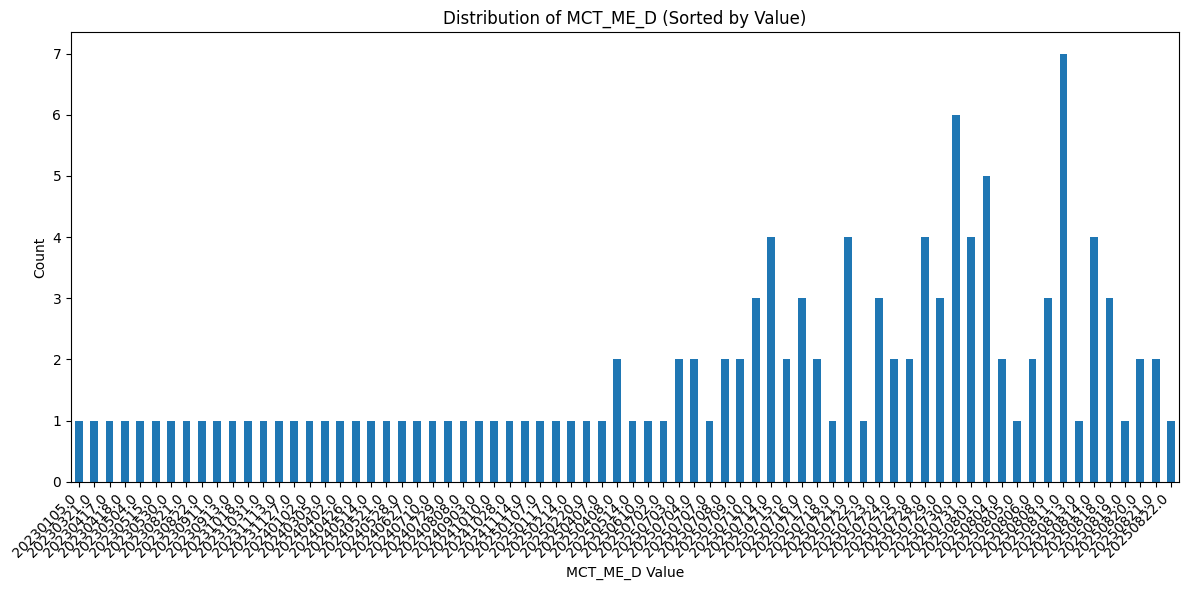

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 적용
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# value_counts() 결과를 내림차순으로 정렬하여 그래프로 시각화
plt.figure(figsize=(12, 6))
df1['MCT_ME_D'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of MCT_ME_D (Sorted by Value)')
plt.xlabel('MCT_ME_D Value')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-119160479.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=monthly_closure_counts, x='MCT_ME_D', y='Count', palette='viridis')


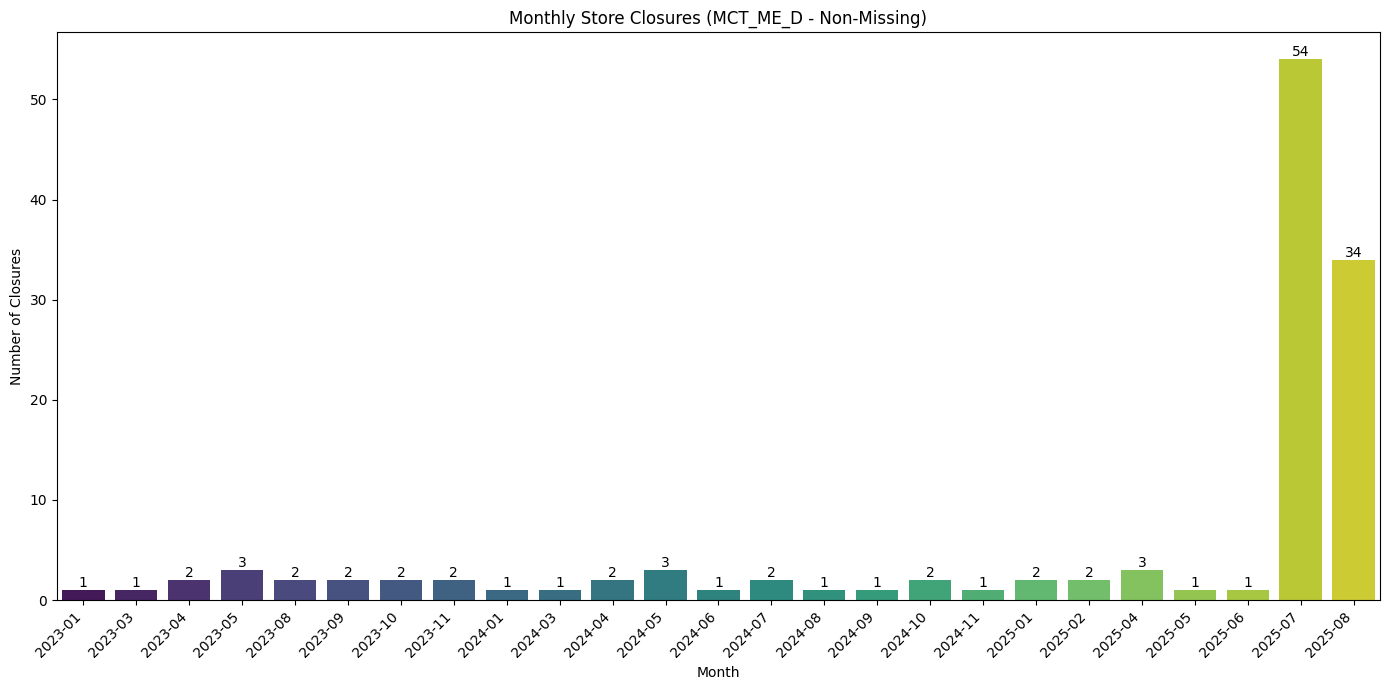

127

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# MCT_ME_D 컬럼에서 결측치가 아닌 행만 선택
non_missing_mct_me_d = df1.dropna(subset=['MCT_ME_D']).copy()

# MCT_ME_D 값을 날짜 형식으로 변환
# .0이 붙어있는 float 형태이므로 int로 먼저 변환 후 문자열로 변환
non_missing_mct_me_d['MCT_ME_D'] = non_missing_mct_me_d['MCT_ME_D'].astype(int).astype(str)

# 날짜 형식으로 변환 (오류 무시)
non_missing_mct_me_d['MCT_ME_D'] = pd.to_datetime(non_missing_mct_me_d['MCT_ME_D'], format='%Y%m%d', errors='coerce')

# 유효한 날짜만 필터링
non_missing_mct_me_d = non_missing_mct_me_d.dropna(subset=['MCT_ME_D'])

# 월별 폐업 카운트 집계
monthly_closure_counts = non_missing_mct_me_d.groupby(non_missing_mct_me_d['MCT_ME_D'].dt.to_period('M')).size().reset_index(name='Count')
monthly_closure_counts['MCT_ME_D'] = monthly_closure_counts['MCT_ME_D'].astype(str) # 시각화를 위해 문자열로 변환

# 월별 막대 그래프 시각화
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=monthly_closure_counts, x='MCT_ME_D', y='Count', palette='viridis')

# 그래프에 개수 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Monthly Store Closures (MCT_ME_D - Non-Missing)')
plt.xlabel('Month')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

display(len(non_missing_mct_me_d))

# df2, df3 결측치 처리

In [ ]:
''' 컬럼명 한국어로 바꾸기'''

# data copy 생성
# df1=df1_org.copy()
# df2=df2_org.copy()
# df3=df3_org.copy()

# 컬럼 한국어로 mapping 할 수 있는 딕셔너리 생성
column_name_mapping = {
    # ============================================
    # 1. 기존에 제공했던 마스터/일반 정보 컬럼
    # ============================================
    'ENCODED_MCT': '가맹점구분번호',
    'MCT_BSE_AR': '가맹점주소',
    'MCT_NM': '가맹점명',
    'MCT_BRD_NUM': '브랜드구분코드',
    'MCT_SIGUNGU_NM': '가맹점지역',
    'HPSN_MCT_ZCD_NM': '업종',
    'HPSN_MCT_BZN_CD_NM': '상권',
    'ARE_D': '개설일',
    'MCT_ME_D': '폐업일',
    'TA_YM': '기준년월',
    'MCT_OPE_MS_CN': '가맹점 운영개월수 구간',
    'RC_M1_SAA': '매출금액 구간',
    'RC_M1_TO_UE_CT': '매출건수 구간',
    'RC_M1_UE_CUS_CN': '유니크 고객 수 구간',
    'RC_M1_AV_NP_AT': '객단가 구간',
    'APV_CE_RAT': '취소율 구간',
    'DLV_SAA_RAT': '배달매출금액 비율',
    'M1_SME_RY_SAA_RAT': '동일 업종 매출금액 비율',
    'M1_SME_RY_CNT_RAT': '동일 업종 매출건수 비율',
    'M12_SME_RY_SAA_PCE_RT': '동일 업종 내 매출 순위 비율',
    'M12_SME_BZN_SAA_PCE_RT': '동일 상권 내 매출 순위 비율',
    'M12_SME_RY_ME_MCT_RAT': '동일 업종 내 해지 가맹점 비중',
    'M12_SME_BZN_ME_MCT_RAT': '동일 상권 내 해지 가맹점 비중',

    # ============================================
    # 2. 새로 추가된 고객/이용 패턴 관련 컬럼
    # ============================================
    # 고객 성별/연령대 비중
    'M12_MAL_1020_RAT': '남성 20대이하 고객 비중',
    'M12_MAL_30_RAT': '남성 30대 고객 비중',
    'M12_MAL_40_RAT': '남성 40대 고객 비중',
    'M12_MAL_50_RAT': '남성 50대 고객 비중',
    'M12_MAL_60_RAT': '남성 60대이상 고객 비중',
    'M12_FME_1020_RAT': '여성 20대이하 고객 비중',
    'M12_FME_30_RAT': '여성 30대 고객 비중',
    'M12_FME_40_RAT': '여성 40대 고객 비중',
    'M12_FME_50_RAT': '여성 50대 고객 비중',
    'M12_FME_60_RAT': '여성 60대이상 고객 비중',

    # 고객 유형 및 재방문
    'MCT_UE_CLN_REU_RAT': '재방문 고객 비중',
    'MCT_UE_CLN_NEW_RAT': '신규 고객 비중',

    # 고객 이용 목적 (거주/직장/유동)
    'RC_M1_SHC_RSD_UE_CLN_RAT': '거주 이용 고객 비율',
    'RC_M1_SHC_WP_UE_CLN_RAT': '직장 이용 고객 비율',
    'RC_M1_SHC_FLP_UE_CLN_RAT': '유동인구 이용 고객 비율'
}

# 컬럼이름 한국어로 바꾸기
df1.rename(columns=column_name_mapping, inplace=True)
df2.rename(columns=column_name_mapping, inplace=True)
df3.rename(columns=column_name_mapping, inplace=True)

In [ ]:
''' data info '''

df1.info()
df1_pre.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가맹점구분번호  4185 non-null   object 
 1   가맹점주소    4185 non-null   object 
 2   가맹점명     4185 non-null   object 
 3   브랜드구분코드  542 non-null    object 
 4   가맹점지역    4185 non-null   object 
 5   업종       4185 non-null   object 
 6   상권       3138 non-null   object 
 7   개설일      4185 non-null   int64  
 8   폐업일      127 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 294.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   가맹점구분번호       4185 non-null   object        
 1   가맹점주소         4185 non-null   object        
 2   가맹점명          4185 non-null   object        
 3   업종            4185 non-null   object        
 4   

df2+df3

In [ ]:
# ----------------------------------------------------
# 1단계: 수정된 결측치 처리 및 데이터 통합
# ----------------------------------------------------
# Lag/Trend 계산 대상 재정의 및 0으로 강제 변환 (안전성 확보)
numerical_cols_for_zero_imputation = [
    '배달매출금액 비율', '동일 업종 매출금액 비율', '동일 업종 매출건수 비율', '동일 업종 내 매출 순위 비율',
    '동일 상권 내 매출 순위 비율', '동일 업종 내 해지 가맹점 비중', '동일 상권 내 해지 가맹점 비중',
    '남성 20대이하 고객 비중', '남성 30대 고객 비중', '남성 40대 고객 비중', '남성 50대 고객 비중',
    '남성 60대이상 고객 비중', '여성 20대이하 고객 비중', '여성 30대 고객 비중', '여성 40대 고객 비중',
    '여성 50대 고객 비중', '여성 60대이상 고객 비중', '재방문 고객 비중', '신규 고객 비중',
    '거주 이용 고객 비율', '직장 이용 고객 비율', '유동인구 이용 고객 비율',
    '취소율 구간' # 취소율 구간은 값 대신 코드(-999999.9)가 있어 0으로 처리함
]

MISSING_VALUE_CODE = -999999.9

# 결측치 코드를 0으로 대체 (활동 없음으로 해석)
for col in numerical_cols_for_zero_imputation:
    # df2와 df3에 해당 컬럼이 있는지 확인 후 처리
    if col in df2.columns:
        # 이전에 실수형이 아닌 object 타입의 '취소율 구간'에 문자열로 -999999.9가 있다면 처리
        df2[col] = df2[col].replace(MISSING_VALUE_CODE, 0)

    if col in df3.columns:
        df3[col] = df3[col].replace(MISSING_VALUE_CODE, 0)


# 데이터 통합 및 정렬 (시계열 계산의 기본)
# df2 (실적)와 df3 (고객) 데이터를 '가맹점구분번호'와 '기준년월'로 Inner Join하여 time_series_data 생성
combined_df = pd.merge(df2, df3, on=['가맹점구분번호', '기준년월'], how='inner')

# df1 (마스터)와 time_series_data를 '가맹점구분번호'로 Left Join하여 최종 데이터 생성
# combined_df = pd.merge(time_series_data, df1, on='가맹점구분번호', how='left')

# 시계열 분석을 위해 상점별/시간순으로 정렬
combined_df = combined_df.sort_values(by=['가맹점구분번호', '기준년월']).reset_index(drop=True)

print("✅ 1단계 완료: 결측치 처리(-999999.9 -> 0) 및 데이터 통합 완료")
print(f"🌟 최종 통합된 데이터프레임 (combined_df) 크기: {combined_df.shape}")

✅ 1단계 완료: 결측치 처리(-999999.9 -> 0) 및 데이터 통합 완료
🌟 최종 통합된 데이터프레임 (combined_df) 크기: (86590, 30)


In [ ]:
# ----------------------------------------------------
# III. 최종 정리 및 인코딩 (랭크 컬럼 포함)
# ----------------------------------------------------

# ✨ 모든 잠재적 랭크 구간 값을 포함하도록 최종 수정된 맵
# 취소율 구간의 고유한 랭크 표현까지 모두 포함합니다.
rank_map = {
    # 1. 일반적인 랭크 구간 (매출, 운영개월수 등)
    '1_상위1구간': 1,
    '1_10%이하': 1,
    '2_10-25%': 2,
    '2_10%미만': 2,
    '3_25-50%': 3,
    '4_50-75%': 4,
    '5_75-90%': 5,
    '6_90%초과(하위 10% 이하)': 6,

    # 2. 취소율 구간의 고유한 랭크 (새로 발견된 값들)
    # '1_상위1구간'은 이미 위에서 매핑됨
    '2_상위2구간': 2,
    '3_상위3구간': 3,
    '4_상위4구간': 4,
    '5_상위5구간': 5,
    '6_상위6구간(하위1구간)': 6 # '하위1구간'이라는 문구가 붙어 있지만 6등분 중 가장 낮은 랭크 (숫자 6)
}


# ✨ 한국어 컬럼명으로 변경된 모든 랭크 컬럼 리스트
rank_cols = [
    '가맹점 운영개월수 구간', '매출금액 구간', '매출건수 구간',
    '유니크 고객 수 구간', '객단가 구간', '취소율 구간' # <-- NaN이 있는 취소율 구간 포함
]

# 1. 순서형 인코딩 및 원본 컬럼 제거
for col in rank_cols:
    # 새로운 '_RANK_INT' 컬럼 생성 (NaN은 맵핑 후에도 NaN으로 유지됨)
    combined_df[f'{col}_RANK_INT'] = combined_df[col].map(rank_map)
    # 원본 범주형 컬럼 제거
    combined_df = combined_df.drop(columns=[col])

# 2. '취소율 구간'의 NaN 값 처리 (Missingness as a Feature, 랭크 7 부여)
# 약 6,600여개의 NaN 값을 새로운 범주인 랭크 7로 채웁니다.
combined_df['취소율 구간_RANK_INT'] = combined_df['취소율 구간_RANK_INT'].fillna(7).astype(int)


print("✅ 모든 랭크/순위형 데이터 순서형 인코딩 완료 (취소율 구간 포함 최종 맵 적용)")
print("⭐ '취소율 구간'의 NaN 값은 새로운 랭크 7로 처리되었습니다.")

✅ 모든 랭크/순위형 데이터 순서형 인코딩 완료 (취소율 구간 포함 최종 맵 적용)
⭐ '취소율 구간'의 NaN 값은 새로운 랭크 7로 처리되었습니다.


In [ ]:
import pandas as pd

# 기준년월 → datetime 변환
combined_df['기준년월'] = pd.to_datetime(combined_df['기준년월'].astype(str), format='%Y%m')

# 확인
print("✅ 기준년월 컬럼 datetime 변환 완료")
print(combined_df['기준년월'].head())
print(combined_df.info())


✅ 기준년월 컬럼 datetime 변환 완료
0   2023-01-01
1   2023-02-01
2   2023-03-01
3   2023-04-01
4   2023-05-01
Name: 기준년월, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   가맹점구분번호                86590 non-null  object        
 1   기준년월                   86590 non-null  datetime64[ns]
 2   배달매출금액 비율              86590 non-null  float64       
 3   동일 업종 매출금액 비율          86590 non-null  float64       
 4   동일 업종 매출건수 비율          86590 non-null  float64       
 5   동일 업종 내 매출 순위 비율       86590 non-null  float64       
 6   동일 상권 내 매출 순위 비율       86590 non-null  float64       
 7   동일 업종 내 해지 가맹점 비중      86590 non-null  float64       
 8   동일 상권 내 해지 가맹점 비중      86590 non-null  float64       
 9   남성 20대이하 고객 비중         86590 non-null  float64       
 10  남성 30대 고객 비중           86590 non-null  float

In [ ]:
import pandas as pd
import numpy as np

print("\n==============================")
print("📊 데이터 전처리 검증 리포트 (combined_df)")
print("==============================\n")

# --- 1️⃣ 순서형 랭크 컬럼 검사 (0~7 범위 및 NaN 확인) ---
print("--- 1. 순서형 랭크 컬럼 검사 ---")
rank_int_cols = [col for col in combined_df.columns if col.endswith('_RANK_INT')]

for col in rank_int_cols:
    print(f"\n[컬럼: {col}]")
    vc = combined_df[col].value_counts(dropna=False, sort=False)
    print(vc)
    min_val, max_val = combined_df[col].min(), combined_df[col].max()
    print(f"범위: {min_val} ~ {max_val}")
    if (min_val < 0) or (max_val > 7):
        print("⚠️ 값이 0~7 범위를 벗어남")
    else:
        print("✅ 범위 정상 (0~7)")

print("\n" + "="*50 + "\n")

# --- 2️⃣ 빈도 인코딩 컬럼 검사 ---
print("--- 2. 빈도 인코딩 컬럼 검사 ---")
freq_cols = [col for col in combined_df.columns if col.endswith('_FREQ')]

if freq_cols:
    for col in freq_cols:
        nan_count = combined_df[col].isna().sum()
        print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
        print(combined_df[col].describe())
else:
    print("✅ '_FREQ' 컬럼 없음 (빈도 인코딩 미적용 데이터)")

print("\n" + "="*50 + "\n")

# --- 3️⃣ Trend / Macro 데이터 검사 ---
print("--- 3. 추세(Trend) 및 Macro 컬럼 이상치 검사 ---")
trend_macro_cols = [col for col in combined_df.columns if 'TREND' in col or '지수' in col or '금리' in col]

if trend_macro_cols:
    for col in trend_macro_cols:
        nan_count = combined_df[col].isna().sum()
        print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
        print(combined_df[col].describe())
else:
    print("✅ Trend/Macro 관련 컬럼 없음")

print("\n" + "="*50 + "\n")

# --- 4️⃣ Object 타입 컬럼 검사 ---
print("--- 4. Object 타입 컬럼 검사 ---")
object_cols = combined_df.select_dtypes(include='object').columns.tolist()

if object_cols:
    print(f"⚠️ 남아있는 Object 컬럼: {object_cols}")
    for col in object_cols:
        print(f"\n[컬럼: {col}] (고유값 {combined_df[col].nunique()}개, NaN {combined_df[col].isna().sum()}개)")
        print(combined_df[col].value_counts(dropna=False).head(10))
else:
    print("✅ Object 컬럼 없음 (모두 수치형 or datetime 정리 완료)")

print("\n" + "="*50 + "\n")

# --- 5️⃣ 종합 요약 ---
print("--- 5. 종합 요약 ---")
print(f"전체 행 수: {len(combined_df):,}")
print(f"결측치 존재 컬럼 수: {(combined_df.isna().sum() > 0).sum()}")
print(f"Object 타입 컬럼 수: {len(object_cols)}")
print(f"순서형 컬럼 수: {len(rank_int_cols)}")
print(f"빈도 인코딩 컬럼 수: {len(freq_cols)}")

print("\n✅ 데이터 전처리 검증 완료. 이상치/결측치 분포를 위에서 확인하세요.")



📊 데이터 전처리 검증 리포트 (combined_df)

--- 1. 순서형 랭크 컬럼 검사 ---

[컬럼: 가맹점 운영개월수 구간_RANK_INT]
가맹점 운영개월수 구간_RANK_INT
5    13454
4    21567
3    21812
2    13119
6     7947
1     8691
Name: count, dtype: int64
범위: 1 ~ 6
✅ 범위 정상 (0~7)

[컬럼: 매출금액 구간_RANK_INT]
매출금액 구간_RANK_INT
6     8220
5    12912
3    21800
2    13167
4    21692
1     8799
Name: count, dtype: int64
범위: 1 ~ 6
✅ 범위 정상 (0~7)

[컬럼: 매출건수 구간_RANK_INT]
매출건수 구간_RANK_INT
5    14211
6     6711
4    21945
1     8719
2    13023
3    21981
Name: count, dtype: int64
범위: 1 ~ 6
✅ 범위 정상 (0~7)

[컬럼: 유니크 고객 수 구간_RANK_INT]
유니크 고객 수 구간_RANK_INT
5    14001
6     6711
4    22026
3    21934
1     8771
2    13147
Name: count, dtype: int64
범위: 1 ~ 6
✅ 범위 정상 (0~7)

[컬럼: 객단가 구간_RANK_INT]
객단가 구간_RANK_INT
4    21781
6     8170
3    21918
5    12888
2    13143
1     8690
Name: count, dtype: int64
범위: 1 ~ 6
✅ 범위 정상 (0~7)

[컬럼: 취소율 구간_RANK_INT]
취소율 구간_RANK_INT
1    52445
7     6632
6     5814
5     5697
4     5551
3     5457
2     4994
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)  # 필요 시 조정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📊 컬럼별 value_counts() 요약")
print("="*80)

for col in combined_df.columns:
    print(f"\n🧩 [컬럼: {col}]")
    print(f"데이터 타입: {combined_df[col].dtype}")
    print(f"결측치 개수: {combined_df[col].isna().sum()}")
    print(f"고유값 개수: {combined_df[col].nunique()}")

    # 숫자형은 구간 분포를, 문자형은 상위 10개만 보여줌
    if np.issubdtype(combined_df[col].dtype, np.number):
        print("📈 숫자형 컬럼 통계:")
        print(combined_df[col].describe())
    else:
        print("🔠 상위 10개 값:")
        print(combined_df[col].value_counts(dropna=False).head(10))

    print("-"*80)


📊 컬럼별 value_counts() 요약

🧩 [컬럼: 가맹점구분번호]
데이터 타입: object
결측치 개수: 0
고유값 개수: 4185
🔠 상위 10개 값:
가맹점구분번호
FFF0DAC445    24
000F03E44A    24
002816BA73    24
003473B465    24
003AC99735    24
0041E4E5AE    24
FFEDAC5747    24
00646B6673    24
FF079A30CE    24
FF03884FF0    24
Name: count, dtype: int64
--------------------------------------------------------------------------------

🧩 [컬럼: 기준년월]
데이터 타입: datetime64[ns]
결측치 개수: 0
고유값 개수: 24
🔠 상위 10개 값:
기준년월
2024-12-01    4155
2024-11-01    4131
2024-10-01    4087
2024-09-01    4030
2024-08-01    3980
2024-07-01    3927
2024-06-01    3881
2024-05-01    3831
2024-04-01    3765
2024-03-01    3712
Name: count, dtype: int64
--------------------------------------------------------------------------------

🧩 [컬럼: 배달매출금액 비율]
데이터 타입: float64
결측치 개수: 0
고유값 개수: 1002
📈 숫자형 컬럼 통계:
count    86590.000000
mean         9.384783
std         22.044341
min          0.000000
25%          0.000000
50%          0.000000
75%          3.400000
max        111.200000
Name:

📈 수치형 컬럼 28개, 🔤 범주형 컬럼 1개


/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2402955253.py:39: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

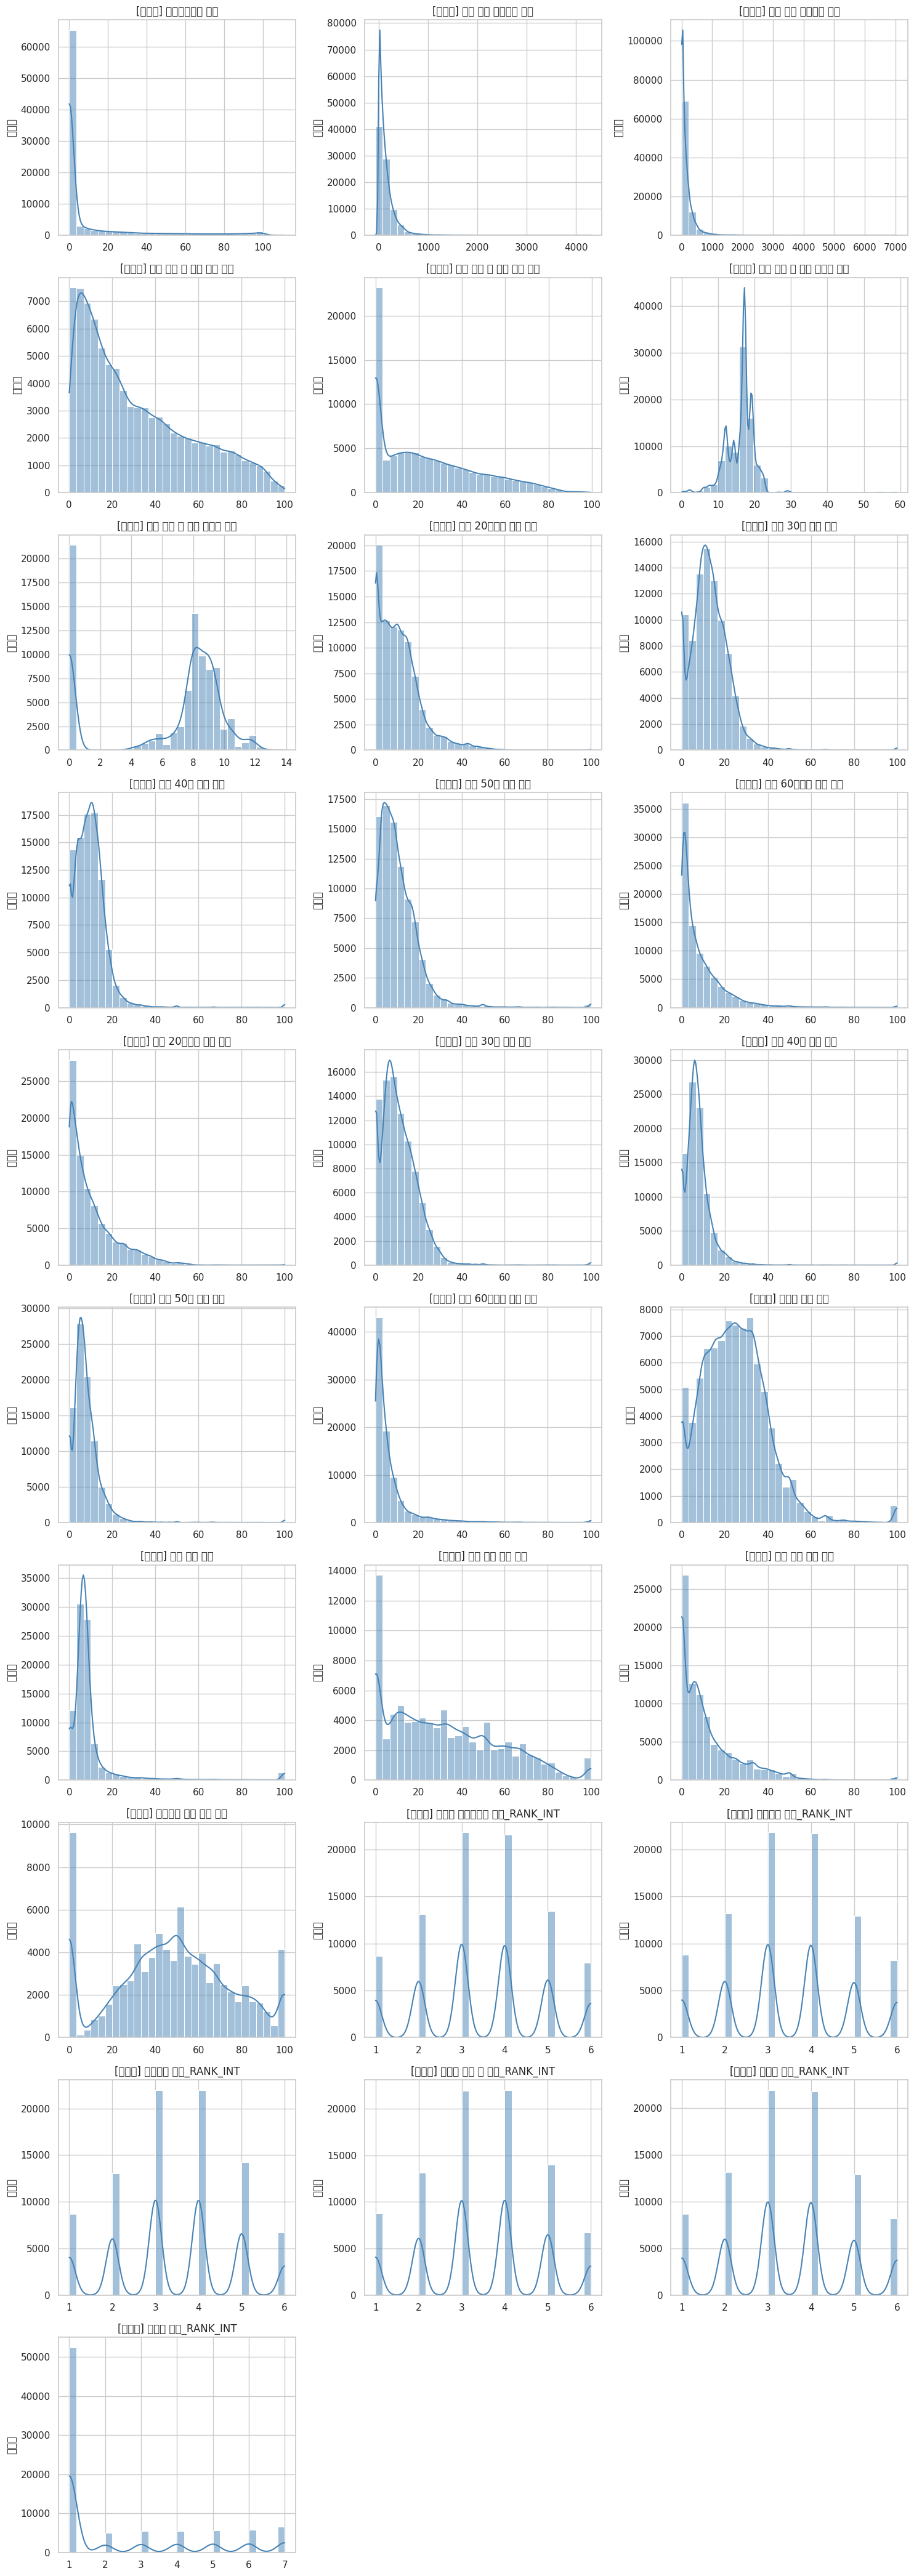

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = combined_df.copy()

# -------------------------------
# 기본 설정
# -------------------------------
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 한글 폰트 (Colab이면 'Malgun Gothic' 가능)
plt.rcParams['axes.unicode_minus'] = False
sns.set(style='whitegrid', palette='muted')

# -------------------------------
# 컬럼 타입 분리
# -------------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number, 'datetime64[ns]']).columns.tolist()

print(f"📈 수치형 컬럼 {len(num_cols)}개, 🔤 범주형 컬럼 {len(cat_cols)}개")

# -------------------------------
# 1️⃣ 수치형 컬럼 분포 시각화 (히스토그램 + KDE)
# -------------------------------
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/3)), ncols=3, figsize=(15, len(num_cols)*1.5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f"[수치형] {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("빈도수")

# 남은 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   가맹점구분번호                86590 non-null  object        
 1   기준년월                   86590 non-null  datetime64[ns]
 2   배달매출금액 비율              86590 non-null  float64       
 3   동일 업종 매출금액 비율          86590 non-null  float64       
 4   동일 업종 매출건수 비율          86590 non-null  float64       
 5   동일 업종 내 매출 순위 비율       86590 non-null  float64       
 6   동일 상권 내 매출 순위 비율       86590 non-null  float64       
 7   동일 업종 내 해지 가맹점 비중      86590 non-null  float64       
 8   동일 상권 내 해지 가맹점 비중      86590 non-null  float64       
 9   남성 20대이하 고객 비중         86590 non-null  float64       
 10  남성 30대 고객 비중           86590 non-null  float64       
 11  남성 40대 고객 비중           86590 non-null  float64       
 12  남성 50대 고객 비중           86590 non-null  float64       
 13  남

In [ ]:
# # -------------------------------
# # 2️⃣ CSV 저장
# # -------------------------------
# save_path = "/content/drive/MyDrive/bigcon/data/raw"
# os.makedirs(save_path, exist_ok=True)

# file_name = os.path.join(save_path, "df23_pre.csv")
# combined_df.to_csv(file_name, index=False, encoding='utf-8')

# print(f"\n📁 저장 완료: {file_name}")
# print(f"저장된 행 개수: {len(combined_df):,}개")



📁 저장 완료: /content/drive/MyDrive/bigcon/data/raw/df23_pre.csv
저장된 행 개수: 4,185개


# 시계열 전체 데이터 df2,df3,df1 merge + 외부데이터

외부데이터 merge

In [ ]:
''' 데이터불러오기'''

import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import os

# ==============================================================================
# 0. 환경 설정 및 파일 로드 (Google Drive 경로)
# ==============================================================================
DRIVE_PATH = '/content/drive/MyDrive/bigcon/data/raw/'
FILE_1_MASTER = os.path.join(DRIVE_PATH, "big_data_set1_f.csv")
FILE_2_PERF = os.path.join(DRIVE_PATH, "big_data_set2_f.csv")
FILE_3_CUST = os.path.join(DRIVE_PATH, "big_data_set3_f.csv")
GEOCODED_FILE = os.path.join(DRIVE_PATH, "df_geocoded.csv")
# FILE_1_PRE = os.path.join(DRIVE_PATH, "df1_pre.csv")
MACRO_FILE = os.path.join(DRIVE_PATH, "macro_data_combined_final.csv")
# Preprocessing=os.path.join(DRIVE_PATH,"df_Preprocessing.csv")


# MISSING_VALUE_CODE = -999999.9
# LAG_PERIOD = 3
# PREDICTION_WINDOW_MONTHS = 5
# SALES_DROP_THRESHOLD = -0.15 # 매출 급락 기준: 전월 대비 10% 하락

# 데이터 로드
try:
    df1_org = pd.read_csv(FILE_1_MASTER, encoding='cp949')
    df2_org = pd.read_csv(FILE_2_PERF, encoding='cp949')
    df3_org= pd.read_csv(FILE_3_CUST, encoding='cp949')
    df_geocoded_org = pd.read_csv(GEOCODED_FILE, encoding='utf8', index_col=0)
    # df1_pre_org= pd.read_csv(FILE_1_PRE, encoding='cp949')
    combined_macro_df = pd.read_csv(MACRO_FILE, encoding='utf8')
    # df_preprocessing=pd.read_csv(Preprocessing, encoding='utf8')
except Exception as e:
    raise RuntimeError(f"❌ 파일 로드 실패: {e}")

# data copy 생성
df1=df1_org.copy()
df2=df2_org.copy()
df3=df3_org.copy()
combined_macro_df=combined_macro_df.copy()
# df=df_preprocessing.copy()
df_geocoded = df_geocoded_org.copy()
# df1_pre = df1_pre_org.copy()


# ----------------------------------------------------
# 1. '가맹점지역' 컬럼 제거
# ----------------------------------------------------
# df1 = df1.drop(columns=['MCT_SIGUNGU_NM'])
# df_geocoded = df_geocoded.drop(columns=['MCT_SIGUNGU_NM'])
# print("✅ 'MCT_SIGUNGU_NM:가맹점지역' 컬럼 제거 완료.")

In [ ]:
# ----------------------------------------------------
# 4단계: 외부 매크로 데이터 통합
# ----------------------------------------------------

MACRO_FILE = "macro_data_combined_final.csv"

# 1. 전처리된 매크로 데이터 로드
try:
    combined_macro_df = pd.read_csv(MACRO_FILE)
    print(f"✅ 매크로 파일 로드 완료: {MACRO_FILE}")
except Exception as e:
    raise RuntimeError(f"❌ 매크로 파일 로드 실패: {e}")

# 2. 메인 데이터 (combined_df)에 매크로 데이터 Left Merge
# '기준년월' (int64)을 기준으로 합치며, combined_df의 모든 행을 유지합니다.

## df1 통합
combined_df = pd.merge(combined_df, df1_pre, on='가맹점구분번호', how='left')

## 외부데이터 통합
combined_df = pd.merge(combined_df, combined_macro_df,
                       on='기준년월',
                       how='left')

print("✅ 최종 데이터 통합 완료 (combined_df + 매크로 데이터)")
print(f"🌟 최종 combined_df 컬럼 수: {combined_df.shape[1]}개")
print("\n--- 통합 후 combined_df 정보 (매크로 컬럼 추가 확인) ---")
print(combined_df.info())

RuntimeError: ❌ 매크로 파일 로드 실패: [Errno 2] No such file or directory: 'macro_data_combined_final.csv'

# 외부데이터 전처리
기준금리 및 소비자물가지수

In [1]:
''' 데이터불러오기'''

import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import os

# ==============================================================================
# 0. 환경 설정 및 파일 로드 (Google Drive 경로)
# ==============================================================================
DRIVE_PATH = '/content/drive/MyDrive/bigcon/data/raw/'
OUT1 = os.path.join(DRIVE_PATH, "한국은행 기준금리 및 여수신금리.csv")
OUT2 = os.path.join(DRIVE_PATH, "소비자물가지수.csv")
OUT3 = os.path.join(DRIVE_PATH, "부동산_월별_데이터_통합.csv")
# OUT4 = os.path.join(DRIVE_PATH, "(월) 지역별 지가변동률.csv")
# FILE_3_CUST = os.path.join(DRIVE_PATH, "big_data_set3_f.csv")


MISSING_VALUE_CODE = -999999.9
# LAG_PERIOD = 3
# PREDICTION_WINDOW_MONTHS = 3
# SALES_DROP_THRESHOLD = -0.10 # 매출 급락 기준: 전월 대비 10% 하락

# 데이터 로드
try:
    out1_org = pd.read_csv(OUT1, encoding='utf-8')
    out2_org = pd.read_csv(OUT2, encoding='utf-8')
    out3_org = pd.read_csv(OUT3, encoding='utf-8')
    # out4_org = pd.read_csv(OUT4, encoding='utf-8')
    # df3_org= pd.read_csv(FILE_3_CUST, encoding='cp949')
except Exception as e:
    try:
        out1_org = pd.read_csv(OUT1, encoding='euc-kr')
        out2_org = pd.read_csv(OUT2, encoding='euc-kr')
        out3_org = pd.read_csv(OUT3, encoding='euc-kr')
        # out4_org = pd.read_csv(OUT4, encoding='cp949')
    except Exception as e:
        raise RuntimeError(f"❌ 파일 로드 실패: {e}")



out1=out1_org.copy()
out2=out2_org.copy()
out3=out3_org.copy()
# out4=out4_org.copy()


금리

In [2]:
out1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   통계표      12 non-null     object 
 1   계정항목     12 non-null     object 
 2   단위       12 non-null     object 
 3   변환       12 non-null     object 
 4   2023/01  9 non-null      float64
 5   2023/02  9 non-null      float64
 6   2023/03  9 non-null      float64
 7   2023/04  9 non-null      float64
 8   2023/05  9 non-null      float64
 9   2023/06  9 non-null      float64
 10  2023/07  9 non-null      float64
 11  2023/08  9 non-null      float64
 12  2023/09  9 non-null      float64
 13  2023/10  9 non-null      float64
 14  2023/11  9 non-null      float64
 15  2023/12  9 non-null      float64
 16  2024/01  9 non-null      float64
 17  2024/02  9 non-null      float64
 18  2024/03  9 non-null      float64
 19  2024/04  9 non-null      float64
 20  2024/05  9 non-null      float64
 21  2024/06  9 non-nul

In [3]:
# 필터링할 계정항목 리스트
target_items = [
    '한국은행 기준금리',
    '정부대출금금리',
    '영세자영업자지원 프로그램대출금리',
    '자금조정 대출금리',
    '자금조정 예금금리'
]

# 해당 항목만 추출
out1 = out1[out1['계정항목'].isin(target_items)].reset_index(drop=True)

print("✅ 필터링 완료:")
print(out1[['통계표', '계정항목']].head())
print(f"\n총 {len(out1)}개 행 선택됨")

# 제거할 메타데이터 컬럼 목록
drop_cols = ['통계표', '단위', '변환']

# 실제로 존재하는 컬럼만 삭제 (안전)
out1 = out1.drop(columns=[c for c in drop_cols if c in out1.columns])

print("✅ 불필요한 컬럼 제거 완료")
print(out1.head())


✅ 필터링 완료:
                        통계표               계정항목
0  1.3.1. 한국은행 기준금리 및 여수신금리          한국은행 기준금리
1  1.3.1. 한국은행 기준금리 및 여수신금리            정부대출금금리
2  1.3.1. 한국은행 기준금리 및 여수신금리  영세자영업자지원 프로그램대출금리
3  1.3.1. 한국은행 기준금리 및 여수신금리          자금조정 대출금리
4  1.3.1. 한국은행 기준금리 및 여수신금리          자금조정 예금금리

총 5개 행 선택됨
✅ 불필요한 컬럼 제거 완료
                계정항목  2023/01  2023/02  2023/03  2023/04  2023/05  2023/06  \
0          한국은행 기준금리    3.500    3.500    3.500    3.500    3.500    3.500   
1            정부대출금금리    3.544    3.544    3.544    3.534    3.534    3.534   
2  영세자영업자지원 프로그램대출금리    2.000    2.000    2.000    2.000    2.000    2.000   
3          자금조정 대출금리    4.500    4.500    4.500    4.500    4.500    4.500   
4          자금조정 예금금리    2.500    2.500    2.500    2.500    2.500    2.500   

   2023/07  2023/08  2023/09  ...  2024/03  2024/04  2024/05  2024/06  \
0    3.500    3.500    3.500  ...    3.500    3.500    3.500    3.500   
1    3.618    3.618    3.618  ...    3.623    3.563    3.563    3

In [6]:
out1_pre=out1.T.copy()
out1_pre

,0,1,2,3,4
계정항목,한국은행 기준금리,정부대출금금리,영세자영업자지원 프로그램대출금리,자금조정 대출금리,자금조정 예금금리
2023/01,3.5,3.544,2.0,4.5,2.5
2023/02,3.5,3.544,2.0,4.5,2.5
2023/03,3.5,3.544,2.0,4.5,2.5
2023/04,3.5,3.534,2.0,4.5,2.5
2023/05,3.5,3.534,2.0,4.5,2.5
2023/06,3.5,3.534,2.0,4.5,2.5
2023/07,3.5,3.618,2.0,4.0,3.0
2023/08,3.5,3.618,2.0,4.0,3.0
2023/09,3.5,3.618,2.0,4.0,3.0


/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-757759976.py:25: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

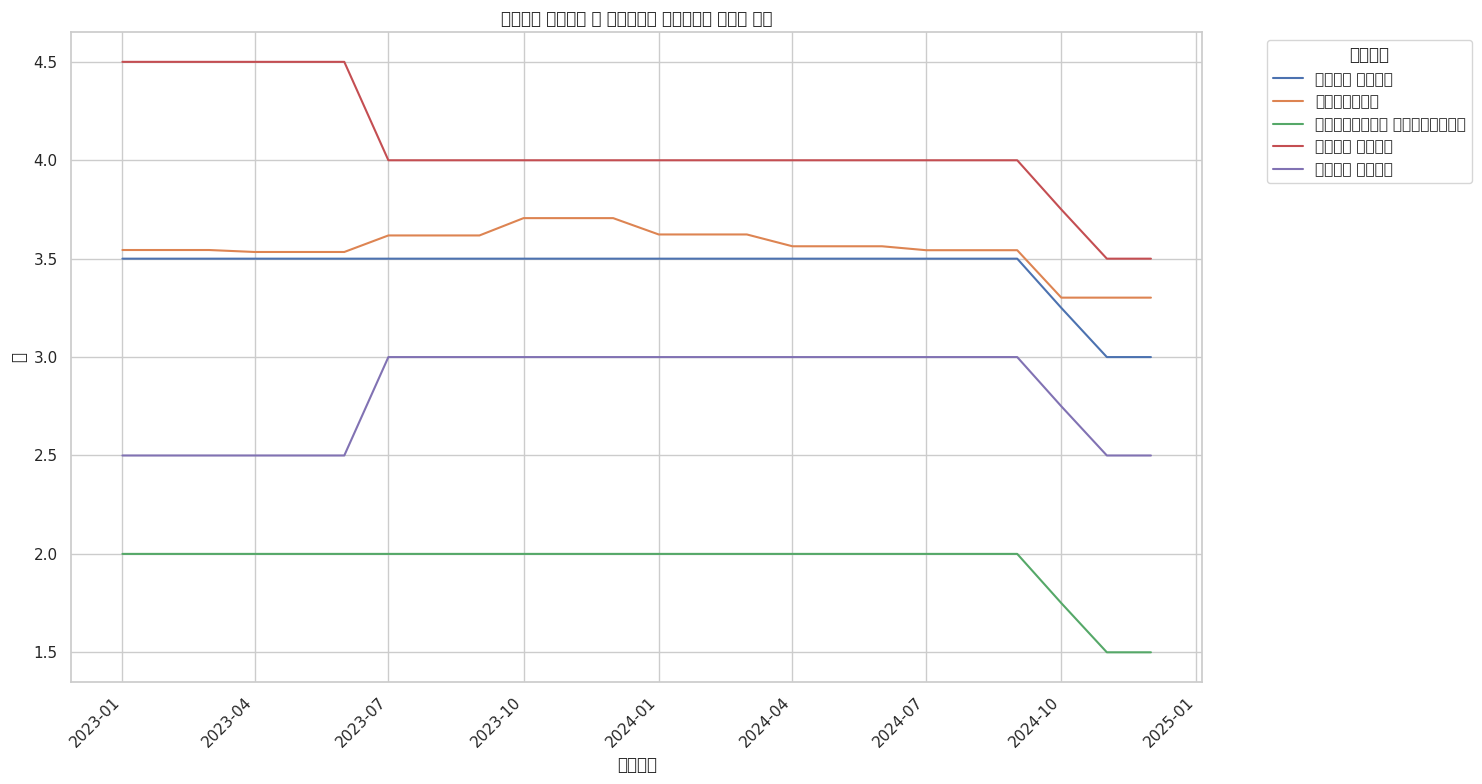

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# out1 데이터프레임을 시계열 형태로 변환 (melt)
out1_melted = out1.melt(
    id_vars='계정항목',
    var_name='기준년월_str',
    value_name='값'
)

# '기준년월_str' 컬럼을 datetime 형식으로 변환
out1_melted['기준년월'] = pd.to_datetime(out1_melted['기준년월_str'], format='%Y/%m')

# 시계열 그래프 시각화
# 각 계정항목별로 별도의 라인으로 표시
plt.figure(figsize=(15, 8))
sns.lineplot(data=out1_melted, x='기준년월', y='값', hue='계정항목')

plt.title('한국은행 기준금리 및 여수신금리 계정항목별 시계열 변화')
plt.xlabel('기준년월')
plt.ylabel('값')
plt.xticks(rotation=45, ha='right')
plt.legend(title='계정항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

소비자물가지수

In [7]:
# 제거할 메타데이터 컬럼 목록
drop_cols = ['통계표', '단위', '변환','가중치']

# 실제로 존재하는 컬럼만 삭제 (안전)
out2 = out2.drop(columns=[c for c in drop_cols if c in out2.columns])

In [8]:
out2['계정항목'] = out2['계정항목'] + '_CPI'
print(out2['계정항목'])

0                    총지수_CPI
1                     상품_CPI
2                  농축수산물_CPI
3                    농산물_CPI
4                     곡물_CPI
5                     채소_CPI
6                     과실_CPI
7                  기타농산물_CPI
8                    축산물_CPI
9                    수산물_CPI
10                  공업제품_CPI
11                  가공식품_CPI
12                   내구재_CPI
13                  섬유제품_CPI
14                   출판물_CPI
15                   석유류_CPI
16                   의약품_CPI
17                   화장품_CPI
18               기타 공업제품_CPI
19          전기 · 가스 · 수도_CPI
20                   서비스_CPI
21                    집세_CPI
22                 공공서비스_CPI
23                 개인서비스_CPI
24                    외식_CPI
25             외식제외개인서비스_CPI
26               신선식품 1)_CPI
27                  신선어개_CPI
28                  신선채소_CPI
29                  신선과실_CPI
30                신선식품제외_CPI
31        농산물및석유류제외지수 2)_CPI
32     식료품 및 에너지제외 지수 3)_CPI
33             생활물가지수 4)_CPI
Name: 계정항목, dt

In [10]:
out2_pre=out2.T.copy()
out2_pre

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
계정항목,총지수_CPI,상품_CPI,농축수산물_CPI,농산물_CPI,곡물_CPI,채소_CPI,과실_CPI,기타농산물_CPI,축산물_CPI,수산물_CPI,...,외식_CPI,외식제외개인서비스_CPI,신선식품 1)_CPI,신선어개_CPI,신선채소_CPI,신선과실_CPI,신선식품제외_CPI,농산물및석유류제외지수 2)_CPI,식료품 및 에너지제외 지수 3)_CPI,생활물가지수 4)_CPI
2023/01,110.07,112.74,113.65,112.07,95.91,113.6,117.05,120.52,117.48,110.55,...,114.57,108.67,114.22,110.89,113.55,117.42,109.88,108.84,107.29,111.74
2023/02,110.33,112.84,113.04,113.11,96.16,117.64,115.84,119.49,113.73,111.14,...,115.4,109.17,115.5,111.52,117.61,116.17,110.11,109.14,107.6,112.19
2023/03,110.52,112.98,113.3,114.9,95.82,118.92,120.18,117.38,111.98,110.56,...,116.29,109.29,117.41,110.9,118.9,120.59,110.24,109.33,107.81,112.34
2023/04,110.77,112.95,111.75,110.65,95.46,110.19,118.35,114.29,113.86,110.74,...,117.06,110.16,113.43,111.06,110.11,118.72,110.64,109.7,108.12,112.57
2023/05,111.13,113.51,112.19,109.01,95.83,105.6,117.92,116.13,117.45,111.38,...,117.34,110.57,111.72,111.81,105.5,118.28,111.08,110.17,108.51,113.05
2023/06,111.16,113.47,112.25,108.32,96.04,100.75,121.51,113.86,118.89,111.09,...,117.57,110.66,111.08,111.43,100.63,121.93,111.13,110.4,108.61,113.08
2023/07,111.29,113.3,114.3,113.64,96.85,107.93,128.71,112.84,117.2,110.06,...,117.87,111.26,116.11,110.16,107.85,129.25,111.08,110.36,108.91,113.0
2023/08,112.28,115.22,120.23,125.44,100.08,125.65,141.28,113.92,117.02,109.36,...,118.01,111.6,127.25,109.3,125.68,142.03,111.68,110.6,109.16,114.51
2023/09,112.85,116.79,123.76,130.69,102.67,131.37,148.26,115.55,119.82,108.74,...,118.24,110.89,131.77,108.5,131.43,149.13,112.11,110.83,109.02,115.72


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,740 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 한글 폰트 설정 완료 (NanumGothic)


/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-948984262.py:38: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/

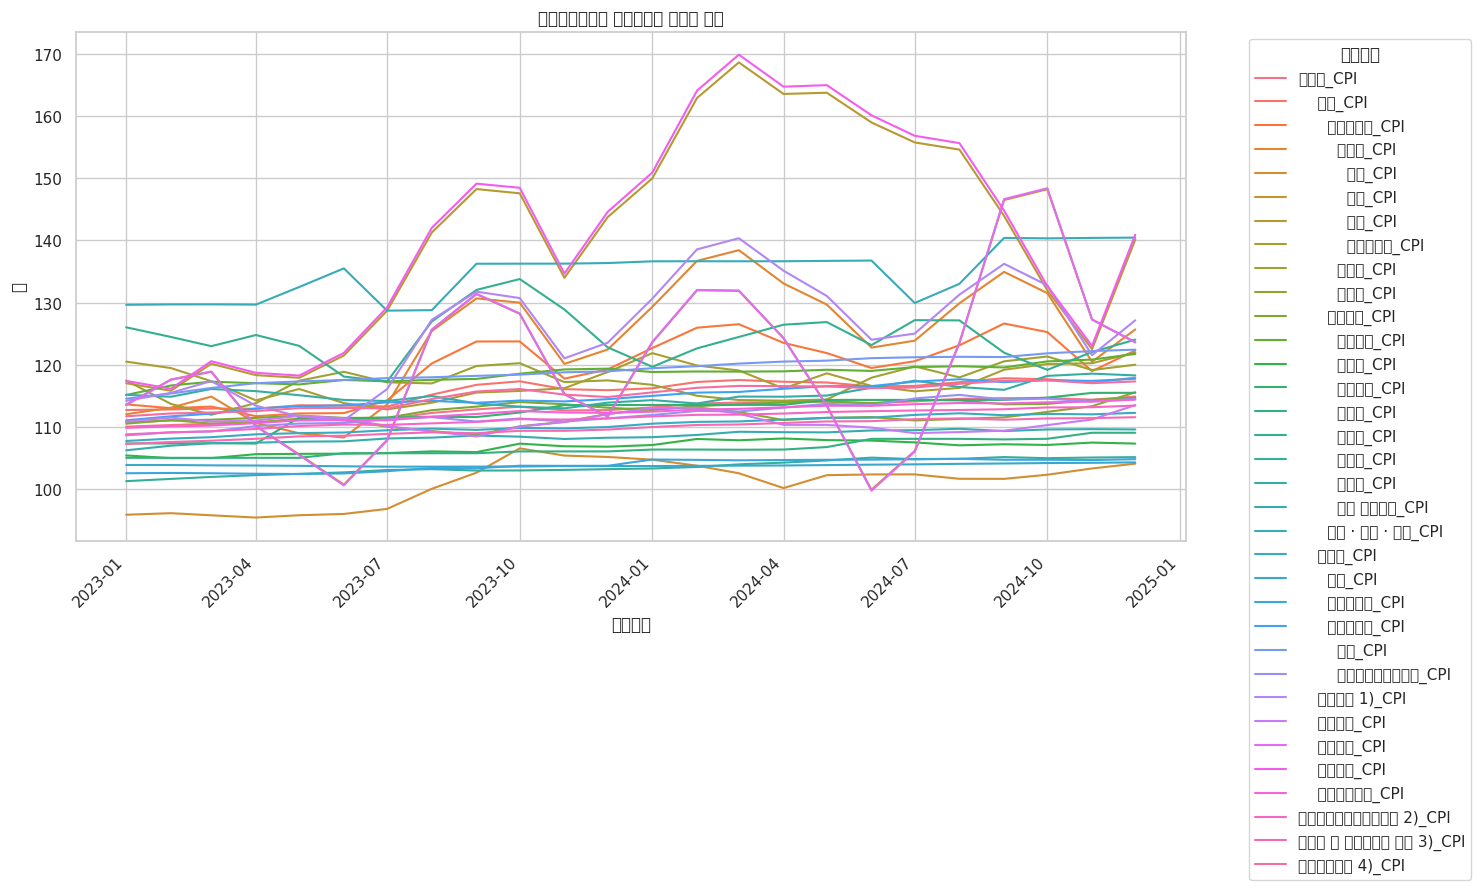

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 나눔바른고딕 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='NanumGothic', style='whitegrid')

print("✅ 한글 폰트 설정 완료 (NanumGothic)")


# 데이터를 시계열 형태로 변환 (melt)
out2_melted = out2.melt(
    id_vars='계정항목',
    var_name='기준년월_str',
    value_name='값'
)

# '기준년월_str' 컬럼을 datetime 형식으로 변환
out2_melted['기준년월'] = pd.to_datetime(out2_melted['기준년월_str'], format='%Y/%m')

# 시계열 그래프 시각화
# 각 계정항목별로 별도의 라인으로 표시
plt.figure(figsize=(15, 8))
sns.lineplot(data=out2_melted, x='기준년월', y='값', hue='계정항목')

plt.title('소비자물가지수 계정항목별 시계열 변화')
plt.xlabel('기준년월')
plt.ylabel('값')
plt.xticks(rotation=45, ha='right')
plt.legend(title='계정항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

외식산업경기동향지수

https://www.atfis.or.kr/fip/front/M000000293/stats/foodindustry.do

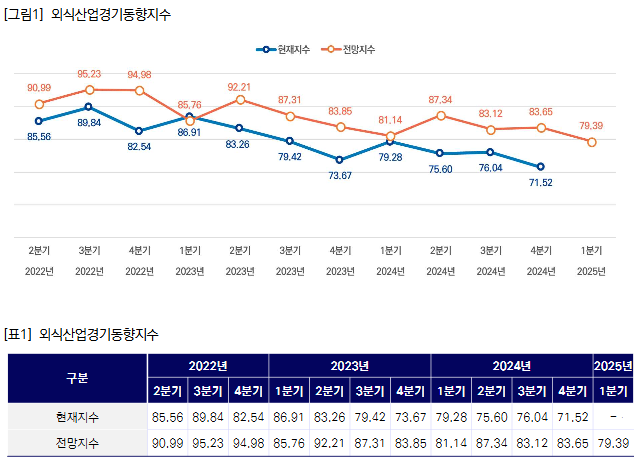

2025년 1분기 외식산업경기동향지수 조사결과

https://www.atfis.or.kr/fip/front/M000000217/board/view.do


In [ ]:
import numpy as np
import pandas as pd

# 분기 라벨 (그래프 순서대로)
quarters = [
    '23년 2분기','23년 3분기','23년 4분기',
    '24년 1분기','24년 2분기','24년 3분기','24년 4분기',
    '25년 1분기','25년 2분기','25년 3분기'
]

# 그래프에 보이는 값 (소수 둘째 자리까지 읽어옴)
# 현지수(청록): 마지막 분기는 수치가 안 보였어서 NaN 처리
current_idx = [83.26, 79.42, 73.67, 79.28, 75.60, 76.04, 71.52, 70.76, 72.76, 72.76]

# 전망지수(주황)
outlook_idx = [92.21, 87.31, 83.85, 81.14, 87.34, 83.12, 83.65, 79.39, 81.07, 82.43]

# 데이터프레임 생성
out3 = pd.DataFrame({
    '분기': quarters,
    '외식산업 경기지수(현재)': current_idx,
    '외식산업 경기지수(전망)': outlook_idx
})

# 분기를 시계열 정렬에 쓰기 좋게 범주형(주문형)으로
out3['분기'] = pd.Categorical(out3['분기'], categories=quarters, ordered=True)

# 확인
out3


,분기,외식산업 경기지수(현재),외식산업 경기지수(전망)
0,23년 2분기,83.26,92.21
1,23년 3분기,79.42,87.31
2,23년 4분기,73.67,83.85
3,24년 1분기,79.28,81.14
4,24년 2분기,75.60,87.34
5,24년 3분기,76.04,83.12
6,24년 4분기,71.52,83.65
7,25년 1분기,70.76,79.39
8,25년 2분기,72.76,81.07
9,25년 3분기,72.76,82.43


부동산 외부 데이터

부동산시장 소비심리지수 등등

https://www.reb.or.kr/r-one/portal/stat/easyStatPage.do

In [34]:
out2_pre

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
계정항목,총지수_CPI,상품_CPI,농축수산물_CPI,농산물_CPI,곡물_CPI,채소_CPI,과실_CPI,기타농산물_CPI,축산물_CPI,수산물_CPI,...,외식_CPI,외식제외개인서비스_CPI,신선식품 1)_CPI,신선어개_CPI,신선채소_CPI,신선과실_CPI,신선식품제외_CPI,농산물및석유류제외지수 2)_CPI,식료품 및 에너지제외 지수 3)_CPI,생활물가지수 4)_CPI
2023/01,110.07,112.74,113.65,112.07,95.91,113.6,117.05,120.52,117.48,110.55,...,114.57,108.67,114.22,110.89,113.55,117.42,109.88,108.84,107.29,111.74
2023/02,110.33,112.84,113.04,113.11,96.16,117.64,115.84,119.49,113.73,111.14,...,115.4,109.17,115.5,111.52,117.61,116.17,110.11,109.14,107.6,112.19
2023/03,110.52,112.98,113.3,114.9,95.82,118.92,120.18,117.38,111.98,110.56,...,116.29,109.29,117.41,110.9,118.9,120.59,110.24,109.33,107.81,112.34
2023/04,110.77,112.95,111.75,110.65,95.46,110.19,118.35,114.29,113.86,110.74,...,117.06,110.16,113.43,111.06,110.11,118.72,110.64,109.7,108.12,112.57
2023/05,111.13,113.51,112.19,109.01,95.83,105.6,117.92,116.13,117.45,111.38,...,117.34,110.57,111.72,111.81,105.5,118.28,111.08,110.17,108.51,113.05
2023/06,111.16,113.47,112.25,108.32,96.04,100.75,121.51,113.86,118.89,111.09,...,117.57,110.66,111.08,111.43,100.63,121.93,111.13,110.4,108.61,113.08
2023/07,111.29,113.3,114.3,113.64,96.85,107.93,128.71,112.84,117.2,110.06,...,117.87,111.26,116.11,110.16,107.85,129.25,111.08,110.36,108.91,113.0
2023/08,112.28,115.22,120.23,125.44,100.08,125.65,141.28,113.92,117.02,109.36,...,118.01,111.6,127.25,109.3,125.68,142.03,111.68,110.6,109.16,114.51
2023/09,112.85,116.79,123.76,130.69,102.67,131.37,148.26,115.55,119.82,108.74,...,118.24,110.89,131.77,108.5,131.43,149.13,112.11,110.83,109.02,115.72


In [35]:
out1.T

,0,1,2,3,4
계정항목,한국은행 기준금리,정부대출금금리,영세자영업자지원 프로그램대출금리,자금조정 대출금리,자금조정 예금금리
2023/01,3.5,3.544,2.0,4.5,2.5
2023/02,3.5,3.544,2.0,4.5,2.5
2023/03,3.5,3.544,2.0,4.5,2.5
2023/04,3.5,3.534,2.0,4.5,2.5
2023/05,3.5,3.534,2.0,4.5,2.5
2023/06,3.5,3.534,2.0,4.5,2.5
2023/07,3.5,3.618,2.0,4.0,3.0
2023/08,3.5,3.618,2.0,4.0,3.0
2023/09,3.5,3.618,2.0,4.0,3.0


In [41]:
# out3 데이터프레임을 기준년월이 202301부터 202412까지인 데이터로 필터링합니다.
out3_filtered = out3[(out3['기준년월'] >= 202301) & (out3['기준년월'] <= 202412)].copy()

# 필터링된 결과 확인
print("--- Filtered out3 Data ---")
print(out3_filtered.head())
print("\n--- Filtered out3 Data Info ---")
out3_filtered.info()

--- Filtered out3 Data ---
      기준년월  지가변동률  소비심리지수
12  202301  0.002    82.8
13  202302  0.002    93.7
14  202303  0.048    97.5
15  202304  0.047    99.3
16  202305  0.083   103.7

--- Filtered out3 Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 12 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    24 non-null     int64  
 1   지가변동률   24 non-null     float64
 2   소비심리지수  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 768.0 bytes


In [42]:
out3_filtered

,기준년월,지가변동률,소비심리지수
12,202301,0.002,82.8
13,202302,0.002,93.7
14,202303,0.048,97.5
15,202304,0.047,99.3
16,202305,0.083,103.7
17,202306,0.087,105.3
18,202307,0.094,109.8
19,202308,0.131,113.4
20,202309,0.201,114.6
21,202310,0.301,108.8


In [44]:
out1.info()
out2.info()
out3_filtered.info()

# out1과 out2를 전치하고 첫 행을 컬럼명으로 설정
out1_T = out1.T
out1_T.columns = out1_T.iloc[0]
out1_T = out1_T[1:].reset_index().rename(columns={'index': '기준년월'})
# 컬럼명 정리 (특수문자/공백 제거)
out1_T.columns = out1_T.columns.astype(str).str.replace(' ', '_').str.replace('[^A-Za-z0-9가-힣_]+', '', regex=True)
out1_T['기준년월'] = out1_T['기준년월'].str.replace('/', '').astype(int)


out2_T = out2.T
out2_T.columns = out2_T.iloc[0]
out2_T = out2_T[1:].reset_index().rename(columns={'index': '기준년월'})
# 컬럼명 정리 (특수문자/공백 제거)
out2_T.columns = out2_T.columns.astype(str).str.replace(' ', '_').str.replace('[^A-Za-z0-9가-힣_]+', '', regex=True)
out2_T['기준년월'] = out2_T['기준년월'].str.replace('/', '').astype(int)


# 세 데이터프레임을 '기준년월' 컬럼 기준으로 병합
merged_macro_df = pd.merge(out1_T, out2_T, on='기준년월', how='outer')
merged_macro_df = pd.merge(merged_macro_df, out3_filtered, on='기준년월', how='outer')

print("\n--- Merged Macro Data Info ---")
merged_macro_df.info()
print("\n--- Merged Macro Data Head ---")
print(merged_macro_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계정항목     5 non-null      object 
 1   2023/01  5 non-null      float64
 2   2023/02  5 non-null      float64
 3   2023/03  5 non-null      float64
 4   2023/04  5 non-null      float64
 5   2023/05  5 non-null      float64
 6   2023/06  5 non-null      float64
 7   2023/07  5 non-null      float64
 8   2023/08  5 non-null      float64
 9   2023/09  5 non-null      float64
 10  2023/10  5 non-null      float64
 11  2023/11  5 non-null      float64
 12  2023/12  5 non-null      float64
 13  2024/01  5 non-null      float64
 14  2024/02  5 non-null      float64
 15  2024/03  5 non-null      float64
 16  2024/04  5 non-null      float64
 17  2024/05  5 non-null      float64
 18  2024/06  5 non-null      float64
 19  2024/07  5 non-null      float64
 20  2024/08  5 non-null      float64
 21  2024/09  5 non-null 

In [45]:
merged_macro_df

,기준년월,한국은행_기준금리,정부대출금금리,영세자영업자지원_프로그램대출금리,자금조정_대출금리,자금조정_예금금리,총지수_CPI,____상품_CPI,______농축수산물_CPI,________농산물_CPI,...,____신선식품_1_CPI,____신선어개_CPI,____신선채소_CPI,____신선과실_CPI,____신선식품제외_CPI,농산물및석유류제외지수_2_CPI,식료품_및_에너지제외_지수_3_CPI,생활물가지수_4_CPI,지가변동률,소비심리지수
0,202301,3.5,3.544,2.0,4.5,2.5,110.07,112.74,113.65,112.07,...,114.22,110.89,113.55,117.42,109.88,108.84,107.29,111.74,0.002,82.8
1,202302,3.5,3.544,2.0,4.5,2.5,110.33,112.84,113.04,113.11,...,115.5,111.52,117.61,116.17,110.11,109.14,107.6,112.19,0.002,93.7
2,202303,3.5,3.544,2.0,4.5,2.5,110.52,112.98,113.3,114.9,...,117.41,110.9,118.9,120.59,110.24,109.33,107.81,112.34,0.048,97.5
3,202304,3.5,3.534,2.0,4.5,2.5,110.77,112.95,111.75,110.65,...,113.43,111.06,110.11,118.72,110.64,109.7,108.12,112.57,0.047,99.3
4,202305,3.5,3.534,2.0,4.5,2.5,111.13,113.51,112.19,109.01,...,111.72,111.81,105.5,118.28,111.08,110.17,108.51,113.05,0.083,103.7
5,202306,3.5,3.534,2.0,4.5,2.5,111.16,113.47,112.25,108.32,...,111.08,111.43,100.63,121.93,111.13,110.4,108.61,113.08,0.087,105.3
6,202307,3.5,3.618,2.0,4.0,3.0,111.29,113.3,114.3,113.64,...,116.11,110.16,107.85,129.25,111.08,110.36,108.91,113.0,0.094,109.8
7,202308,3.5,3.618,2.0,4.0,3.0,112.28,115.22,120.23,125.44,...,127.25,109.3,125.68,142.03,111.68,110.6,109.16,114.51,0.131,113.4
8,202309,3.5,3.618,2.0,4.0,3.0,112.85,116.79,123.76,130.69,...,131.77,108.5,131.43,149.13,112.11,110.83,109.02,115.72,0.201,114.6
9,202310,3.5,3.706,2.0,4.0,3.0,113.27,117.36,123.77,130.0,...,130.74,110.07,128.26,148.47,112.58,111.28,109.4,116.12,0.301,108.8


In [47]:
# import os

# # 저장할 파일 경로 설정
# DRIVE_PATH = '/content/drive/MyDrive/bigcon/data/raw/'
# output_file = os.path.join(DRIVE_PATH, "out.csv")

# # 데이터프레임을 CSV 파일로 저장 (인덱스 제외)
# merged_macro_df.to_csv(output_file, index=False, encoding='utf-8')

# print(f"✅ 데이터가 다음 위치에 저장되었습니다: {output_file}")

✅ 데이터가 다음 위치에 저장되었습니다: /content/drive/MyDrive/bigcon/data/raw/out.csv


# 외부데이터 월별 mapping 총합

In [ ]:
import pandas as pd
import numpy as np
import os

# out1 (한국은행 기준금리)과 out2 (소비자물가지수)가 로드되었다고 가정합니다.

def preprocess_single_macro_df_v2(df_macro, target_name, date_start_col_name):
    """
    로드된 매크로 DataFrame을 Pandas melt() 기능을 사용하여 월별 긴 포맷으로 변환하는 함수.
    """

    # 1. 목표 항목 (target_name)이 포함된 행 찾기
    df_target_row = df_macro[df_macro['계정항목'] == target_name].copy()

    if df_target_row.empty:
        print(f"경고: DataFrame에서 '{target_name}' 항목을 찾을 수 없습니다.")
        return pd.DataFrame()

    # 2. 데이터 Melt (Long Format으로 변환)
    # 날짜 컬럼 인덱스를 찾음
    melt_start_col_index = df_macro.columns.get_loc(date_start_col_name)

    # id_vars: 고정할 식별자 컬럼들 (날짜 컬럼 이전의 모든 컬럼)
    id_cols = df_macro.columns[:melt_start_col_index].tolist()
    # value_vars: 녹일 컬럼들 (날짜 컬럼)
    value_cols = df_macro.columns[melt_start_col_index:].tolist()

    # '계정항목'이 포함된 행만 Long Format으로 변환
    df_melt = df_target_row.melt(
        id_vars=id_cols,
        value_vars=value_cols,
        var_name='기준년월_str',
        value_name=target_name
    )

    # 3. '기준년월' 컬럼 포맷팅 ('2023/01' -> 202301)
    df_melt['기준년월'] = df_melt['기준년월_str'].str.replace('/', '', regex=False).astype(int)

    # 4. 값 컬럼 정제 및 숫자로 변환
    df_melt[target_name] = pd.to_numeric(
        df_melt[target_name].astype(str).str.replace(',', '').str.strip(),
        errors='coerce'
    )

    # 최종 필요한 컬럼만 선택
    return df_melt[['기준년월', target_name]].dropna(subset=[target_name]).reset_index(drop=True)

# ----------------------------------------------------
# 1. 한국은행 기준금리 (out1) 처리: '한국은행 기준금리' 추출
# ----------------------------------------------------
df_rate_final = preprocess_single_macro_df_v2(out1, '한국은행 기준금리', '2023/01')

# ----------------------------------------------------
# 2. 소비자물가지수 (out2) 처리: '총지수' 추출
# ----------------------------------------------------
df_cpi_final = preprocess_single_macro_df_v2(out2, '총지수', '2023/01')
df_cpi_final.rename(columns={'총지수': '소비자물가지수'}, inplace=True)


# ----------------------------------------------------
# 3. 데이터 통합 및 저장
# ----------------------------------------------------
OUTPUT_FILE = "macro_data_combined_final.csv"

# 기준년월 기준으로 Outer Join (모든 기간 포함)
combined_macro_df = pd.merge(df_cpi_final, df_rate_final, on='기준년월', how='outer').sort_values(by='기준년월').reset_index(drop=True)

# CSV 파일로 저장
combined_macro_df.to_csv(OUTPUT_FILE, index=False)

print(f"✅ 매크로 데이터 전처리 및 저장 완료: {OUTPUT_FILE}")
print("헤드 5줄 미리보기:")
print(combined_macro_df.head())
print("\n데이터 정보:")
print(combined_macro_df.info())

✅ 매크로 데이터 전처리 및 저장 완료: macro_data_combined_final.csv
헤드 5줄 미리보기:
     기준년월  소비자물가지수  한국은행 기준금리
0  202301   110.07        3.5
1  202302   110.33        3.5
2  202303   110.52        3.5
3  202304   110.77        3.5
4  202305   111.13        3.5

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준년월       24 non-null     int64  
 1   소비자물가지수    24 non-null     float64
 2   한국은행 기준금리  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes
None


In [ ]:
combined_macro_df

,기준년월,소비자물가지수,한국은행 기준금리
0,202301,110.07,3.50
1,202302,110.33,3.50
2,202303,110.52,3.50
3,202304,110.77,3.50
4,202305,111.13,3.50
5,202306,111.16,3.50
6,202307,111.29,3.50
7,202308,112.28,3.50
8,202309,112.85,3.50
9,202310,113.27,3.50


# 폐업일 기준 비율

In [2]:
''' 데이터불러오기'''

import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import os

# ==============================================================================
# 0. 환경 설정 및 파일 로드 (Google Drive 경로)
# ==============================================================================
DRIVE_PATH = '/content/drive/MyDrive/bigcon/data/raw/'
FILE_1_MASTER = os.path.join(DRIVE_PATH, "big_data_set1_f.csv")
FILE_2_PERF = os.path.join(DRIVE_PATH, "big_data_set2_f.csv")
FILE_3_CUST = os.path.join(DRIVE_PATH, "big_data_set3_f.csv")
GEOCODED_FILE = os.path.join(DRIVE_PATH, "df_geocoded.csv")
MACRO_FILE = os.path.join(DRIVE_PATH, "macro_data_combined_final.csv")
Preprocessing=os.path.join(DRIVE_PATH,"df_Preprocessing.csv")

FILE_1_PRE=os.path.join(DRIVE_PATH,"df1_pre.csv")
FILE_23_PRE=os.path.join(DRIVE_PATH,"df23_pre.csv")


# MISSING_VALUE_CODE = -999999.9
# LAG_PERIOD = 3
# PREDICTION_WINDOW_MONTHS = 5
# SALES_DROP_THRESHOLD = -0.15 # 매출 급락 기준: 전월 대비 10% 하락

# 데이터 로드
try:
    df1_org = pd.read_csv(FILE_1_MASTER, encoding='cp949')
    df2_org = pd.read_csv(FILE_2_PERF, encoding='cp949')
    df3_org= pd.read_csv(FILE_3_CUST, encoding='cp949')
    df_geocoded_org = pd.read_csv(GEOCODED_FILE, encoding='utf8', index_col=0)
    combined_macro_df = pd.read_csv(MACRO_FILE, encoding='utf8')
    df_preprocessing=pd.read_csv(Preprocessing, encoding='utf8')

    df1_pre_org=pd.read_csv(FILE_1_PRE, encoding='utf8')
    df23_pre_org=pd.read_csv(FILE_23_PRE, encoding='utf8')

except Exception as e:
    raise RuntimeError(f"❌ 파일 로드 실패: {e}")

# data copy 생성
df1=df1_org.copy()
df2=df2_org.copy()
df3=df3_org.copy()
out=combined_macro_df.copy()
df=df_preprocessing.copy()
df_geocoded = df_geocoded_org.copy()

df1_pre=df1_pre_org.copy()
df23_pre=df23_pre_org.copy()

In [ ]:
df1_pre['폐업일']

In [10]:
total = len(df1_pre)
closed = df1_pre['폐업일'].notna().sum()   # 폐업일이 존재하는 점포 수
open_ = df1_pre['폐업일'].isna().sum()     # 폐업일이 없는 점포 수

print(f"총 점포 수: {total:,}")
print(f"폐업 점포 수: {closed:,} ({closed/total*100:.2f}%)")
print(f"영업 중 점포 수: {open_:,} ({open_/total*100:.2f}%)")


총 점포 수: 4,185
폐업 점포 수: 127 (3.03%)
영업 중 점포 수: 4,058 (96.97%)


In [11]:
# 업종별 폐업점포 수와 영업중점포 수 집계
summary_by_ind = (
    df1_pre
    .groupby('업종')['폐업일']
    .agg([
        ('폐업점포수', lambda x: x.notna().sum()),
        ('영업중점포수', lambda x: x.isna().sum())
    ])
    .reset_index()
)

# 총합 및 비율 계산
summary_by_ind['총점포수'] = summary_by_ind['폐업점포수'] + summary_by_ind['영업중점포수']
summary_by_ind['폐업비율(%)'] = (summary_by_ind['폐업점포수'] / summary_by_ind['총점포수'] * 100).round(2)

# 폐업비율 순으로 정렬
summary_by_ind = summary_by_ind.sort_values('폐업비율(%)', ascending=False).reset_index(drop=True)

# 결과 출력
summary_by_ind


,업종,폐업점포수,영업중점포수,총점포수,폐업비율(%)
0,구내식당/푸드코트,1,1,2,50.00
1,와인샵,1,3,4,25.00
2,중식-훠궈/마라탕,1,4,5,20.00
3,수산물,1,6,7,14.29
4,일식-샤브샤브,1,6,7,14.29
5,도시락,1,7,8,12.50
6,식품 제조,2,17,19,10.53
7,와인바,3,27,30,10.00
8,샌드위치/토스트,3,32,35,8.57
9,일식-우동/소바/라면,1,11,12,8.33


# 참고

브랜드구분코드 전처리

빈도인코딩

'미분류'는 중복이 아닌 '구조적 특징' (Addressing Redundancy)
네가 걱정하는 '미분류'의 중복성은 발생하지 않아. 왜냐하면 '미분류'는 단순한 NaN이 아니라, **"브랜드에 속하지 않는 독립 상점"**이라는 가장 흔하고 중요한 특징을 나타내기 때문이야.

'미분류'의 값: 전체 8만여 개의 행 중 80%가 '미분류'라면, 브랜드구분코드_FREQ 컬럼에서 '미분류'인 행의 값은 0.80이 될 거야.

특정 브랜드의 값: '커피전문점2414'가 전체에서 0.5%라면, 이 행의 값은 0.005가 되지.

모델은 이 숫자를 보고 **"이 상점(0.80)은 대부분의 상점과 마찬가지로 독립 점포군에 속하며, 이 상점(0.005)은 매우 희귀한 특정 브랜드에 속하는구나"**라고 명확히 구분하여 학습할 수 있어. 결론적으로, '미분류'는 데이터의 가장 큰 구조를 설명하는 핵심 범주가 되는 거야.


In [ ]:
import pandas as pd
import numpy as np

BRAND_COL = '브랜드구분코드'
FREQ_COL = f'{BRAND_COL}_FREQ'

# 1. 결측치 처리: NaN 값을 '미분류'로 대체하여 하나의 특징으로 만듭니다.
# (이전에 이미 처리된 상태일 수 있지만, 안전을 위해 다시 실행합니다.)
combined_df[BRAND_COL] = combined_df[BRAND_COL].fillna('미분류')

# 2. 빈도 인코딩 (Frequency Encoding): 범주를 수치형 빈도(비율)로 변환
# '미분류'를 포함한 모든 고유 브랜드 코드의 빈도를 계산합니다.
freq_map = combined_df[BRAND_COL].value_counts(normalize=True).to_dict()
combined_df[FREQ_COL] = combined_df[BRAND_COL].map(freq_map)

# 3. 원본 컬럼 제거: 정보가 모두 빈도 컬럼에 담겼으므로 원본은 제거합니다.
combined_df = combined_df.drop(columns=[BRAND_COL])

print(f"✅ '{BRAND_COL}' 컬럼 전처리 완료")
print(f"🌟 새로운 빈도 컬럼 '{FREQ_COL}'의 통계:")
print(combined_df[FREQ_COL].describe())

✅ '브랜드구분코드' 컬럼 전처리 완료
🌟 새로운 빈도 컬럼 '브랜드구분코드_FREQ'의 통계:
count    86590.000000
mean         0.747670
std          0.295447
min          0.000023
25%          0.864592
50%          0.864592
75%          0.864592
max          0.864592
Name: 브랜드구분코드_FREQ, dtype: float64


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   가맹점구분번호                86590 non-null  object 
 1   기준년월                   86590 non-null  int64  
 2   배달매출금액 비율              86590 non-null  float64
 3   동일 업종 매출금액 비율          86590 non-null  float64
 4   동일 업종 매출건수 비율          86590 non-null  float64
 5   동일 업종 내 매출 순위 비율       86590 non-null  float64
 6   동일 상권 내 매출 순위 비율       86590 non-null  float64
 7   동일 업종 내 해지 가맹점 비중      86590 non-null  float64
 8   동일 상권 내 해지 가맹점 비중      86590 non-null  float64
 9   남성 20대이하 고객 비중         86590 non-null  float64
 10  남성 30대 고객 비중           86590 non-null  float64
 11  남성 40대 고객 비중           86590 non-null  float64
 12  남성 50대 고객 비중           86590 non-null  float64
 13  남성 60대이상 고객 비중         86590 non-null  float64
 14  여성 20대이하 고객 비중         86590 non-null  float64
 15  여성

In [ ]:
combined_df.describe(include='all')

,가맹점구분번호,기준년월,배달매출금액 비율,동일 업종 매출금액 비율,동일 업종 매출건수 비율,동일 업종 내 매출 순위 비율,동일 상권 내 매출 순위 비율,동일 업종 내 해지 가맹점 비중,동일 상권 내 해지 가맹점 비중,남성 20대이하 고객 비중,...,상권,개설일,폐업일,가맹점 운영개월수 구간_RANK_INT,매출금액 구간_RANK_INT,매출건수 구간_RANK_INT,유니크 고객 수 구간_RANK_INT,객단가 구간_RANK_INT,취소율 구간_RANK_INT,브랜드구분코드_FREQ
count,86590,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,...,65171,8.659000e+04,2.334000e+03,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000
unique,4185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FFF0DAC445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,성수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,202360.704850,9.384783,134.503306,152.312380,31.184643,24.070313,16.187137,6.417040,11.259238,...,NaN,2.017494e+07,2.024871e+07,3.482908,3.478242,3.462398,3.455849,3.479778,2.434473,0.747670
std,NaN,49.948354,22.044341,167.981671,227.070665,25.253279,22.843491,3.876532,3.860769,9.964960,...,NaN,5.724404e+04,4.974240e+03,1.419992,1.425197,1.395284,1.395672,1.420959,2.077886,0.295447
min,NaN,202301.000000,0.000000,-70.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.990023e+07,2.023010e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000023
25%,NaN,202307.000000,0.000000,25.200000,22.100000,9.900000,1.300000,14.100000,4.200000,3.744925,...,NaN,2.015031e+07,2.025070e+07,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.864592
50%,NaN,202401.000000,0.000000,82.500000,81.700000,23.900000,18.900000,17.000000,8.000000,9.637500,...,NaN,2.019091e+07,2.025072e+07,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.864592
75%,NaN,202407.000000,3.400000,181.700000,199.600000,48.200000,39.200000,18.700000,9.000000,15.903450,...,NaN,2.022042e+07,2.025080e+07,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.864592


In [ ]:
import pandas as pd
import numpy as np

print("--- 1. 순서형 랭크 컬럼 검사 (0~7 범위 및 NaN 확인) ---")
# 순서형 인코딩 후 생성된 _RANK_INT 컬럼들의 분포를 확인
rank_int_cols = [col for col in combined_df.columns if col.endswith('_RANK_INT')]

for col in rank_int_cols:
    print(f"\n[컬럼: {col}]")
    # value_counts(dropna=False)를 사용하여 모든 랭크(1~7)와 NaN 개수(0이어야 함)를 확인
    print(combined_df[col].value_counts(dropna=False, sort=False))

print("\n" + "="*50 + "\n")
print("--- 2. 빈도 인코딩 컬럼 검사 (0.0~1.0 범위 및 NaN 확인) ---")
# 빈도 인코딩 후 생성된 _FREQ 컬럼들의 분포를 확인
freq_cols = [col for col in combined_df.columns if col.endswith('_FREQ')]

for col in freq_cols:
    nan_count = combined_df[col].isna().sum()
    print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
    # describe()로 최솟값(0에 가까움), 최댓값(1.0), 평균 분포를 확인
    print(combined_df[col].describe())

print("\n" + "="*50 + "\n")
print("--- 3. 추세(Trend) 컬럼 및 Macro 데이터 이상치/NaN 확인 ---")
# Trend 컬럼은 계산 과정에서 Inf/-Inf 같은 이상치가 생길 수 있으므로 확인
trend_macro_cols = [col for col in combined_df.columns if 'TREND' in col or '지수' in col or '금리' in col]

for col in trend_macro_cols:
    # 결측치 개수와 기술 통계를 확인하여 극단적인 값이나 NaN 여부를 확인
    nan_count = combined_df[col].isna().sum()
    print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
    print(combined_df[col].describe())

print("\n" + "="*50 + "\n")
print("--- 4. 최종 점검: 남은 Object 컬럼 확인 ---")
# Object 타입 컬럼이 남아있다면 문제가 있을 수 있으므로 확인
object_cols = combined_df.select_dtypes(include='object').columns.tolist()

if object_cols:
    print(f"⚠️ 남아있는 Object 컬럼: {object_cols}")
    for col in object_cols:
        print(f"\n[컬럼: {col}] (고유값 수: {combined_df[col].nunique()})")
        # Top 10 값과 NaN 포함 여부 확인
        print(combined_df[col].value_counts(dropna=False).head(10))
else:
    print("✅ 데이터프레임에 남아있는 Object 컬럼 없음. 데이터 타입이 깨끗합니다.")

--- 1. 순서형 랭크 컬럼 검사 (0~7 범위 및 NaN 확인) ---

[컬럼: 가맹점 운영개월수 구간_RANK_INT]
가맹점 운영개월수 구간_RANK_INT
5    13454
4    21567
3    21812
2    13119
6     7947
1     8691
Name: count, dtype: int64

[컬럼: 매출금액 구간_RANK_INT]
매출금액 구간_RANK_INT
6     8220
5    12912
3    21800
2    13167
4    21692
1     8799
Name: count, dtype: int64

[컬럼: 매출건수 구간_RANK_INT]
매출건수 구간_RANK_INT
5    14211
6     6711
4    21945
1     8719
2    13023
3    21981
Name: count, dtype: int64

[컬럼: 유니크 고객 수 구간_RANK_INT]
유니크 고객 수 구간_RANK_INT
5    14001
6     6711
4    22026
3    21934
1     8771
2    13147
Name: count, dtype: int64

[컬럼: 객단가 구간_RANK_INT]
객단가 구간_RANK_INT
4    21781
6     8170
3    21918
5    12888
2    13143
1     8690
Name: count, dtype: int64

[컬럼: 취소율 구간_RANK_INT]
취소율 구간_RANK_INT
1    52445
7     6632
6     5814
5     5697
4     5551
3     5457
2     4994
Name: count, dtype: int64


--- 2. 빈도 인코딩 컬럼 검사 (0.0~1.0 범위 및 NaN 확인) ---

[컬럼: 브랜드구분코드_FREQ] (NaN: 0개)
count    86590.000000
mean         0.747670
std          

상권데이터채우기

1. GIS (지리 정보 시스템) 기반 오버레이 (가장 정확)
방법: 서울시 상권 경계 데이터(GeoJSON 등)를 구하고, 모든 가맹점주소를 위도/경도로 변환합니다. 각 좌표가 어느 상권 경계 폴리곤 안에 속하는지 계산하여 상권을 매칭합니다.

필요 도구: geopy (주소->좌표 변환), geopandas (공간 분석)

2. K-Nearest Neighbors (KNN) 기반 채우기
방법: 상권 데이터가 있는 상점들의 좌표를 기준으로, 결측치 상점과 가장 가까운 N개의 상점들의 상권을 확인하여 다수결로 채웁니다.

필요 도구: geopy, scikit-learn (KNN 알고리즘)

In [ ]:
# ==============================================================================
# 0. 환경 설정 및 파일 로드 (Google Drive 경로)
# ==============================================================================
DRIVE_PATH = '/content/drive/MyDrive/bigcon/data/raw/'
GEOCODED_FILE = os.path.join(DRIVE_PATH, "df_geocoded.csv")


try:
    # ⚠️ index_col=0을 추가하여 'Unnamed: 0' 컬럼을 제거
    df_geocoded_org = pd.read_csv(GEOCODED_FILE, encoding='utf8', index_col=0)

except Exception as e:
    # 인코딩 에러가 발생했을 가능성을 대비하여 아래와 같이 수정
    try:
        df_geocoded_org = pd.read_csv(GEOCODED_FILE, encoding='cp949', index_col=0)
    except Exception as e:
        raise RuntimeError(f"❌ 파일 로드 실패: {e}")

# 'Unnamed: 0' 컬럼이 제거된 깔끔한 데이터프레임
df_geocoded = df_geocoded_org.copy()

print("✅ 'Unnamed: 0' 컬럼 제거 및 파일 로드 완료")
print("\n--- df_geocoded 최종 컬럼 정보 ---")
print(df_geocoded.info())

✅ 'Unnamed: 0' 컬럼 제거 및 파일 로드 완료

--- df_geocoded 최종 컬럼 정보 ---
<class 'pandas.core.frame.DataFrame'>
Index: 4170 entries, 0 to 4169
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENCODED_MCT         4170 non-null   object 
 1   MCT_BSE_AR          4170 non-null   object 
 2   MCT_NM              4170 non-null   object 
 3   MCT_BRD_NUM         541 non-null    object 
 4   MCT_SIGUNGU_NM      4170 non-null   object 
 5   HPSN_MCT_ZCD_NM     4170 non-null   object 
 6   HPSN_MCT_BZN_CD_NM  3130 non-null   object 
 7   ARE_D               4170 non-null   int64  
 8   MCT_ME_D            126 non-null    float64
 9   LAT                 4170 non-null   float64
 10  LNG                 4170 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 390.9+ KB
None


In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import os

# --- 0. 상수 정의 (컬럼명) ---
ID_COL = '가맹점구분번호'
BZN_COL = '상권'
LAT_COL = 'LAT'
LON_COL = 'LNG'

# --- 1. KNN Imputation 함수 정의 ---
def knn_impute_bzn(row, known_data, k=3):
    """결측치 상점의 가장 가까운 이웃 K개의 상권 중 최빈값으로 상권을 채움 (유클리드 거리 기반)"""
    # 결측치인 행의 좌표
    target_coords = np.array([row[LAT_COL], row[LON_COL]])
    # 알려진 데이터의 좌표
    known_coords = known_data[[LAT_COL, LON_COL]].values

    # 유클리드 거리 계산
    distances = np.sqrt(np.sum((known_coords - target_coords)**2, axis=1))

    # 가장 가까운 k개의 이웃의 상권 중 최빈값 선택
    nearest_bzns = known_data.iloc[np.argsort(distances)[:k]][BZN_COL]
    return nearest_bzns.mode()[0] if not nearest_bzns.mode().empty else '상권_유추실패'

# --- 2. Geocoded 데이터 Merge ---
# df_geocoded에 컬럼명 변경 적용 (ENCODED_MCT -> 가맹점구분번호)
df_geocoded.rename(columns={'ENCODED_MCT': ID_COL, 'LAT': LAT_COL, 'LNG': LON_COL}, inplace=True)
df_geocoded = df_geocoded[[ID_COL, LAT_COL, LON_COL]].drop_duplicates(subset=[ID_COL]).copy()

# combined_df에 좌표 정보 Left Merge (combined_df가 이미 존재함을 가정)
combined_df = pd.merge(combined_df, df_geocoded, on=ID_COL, how='left')
print("✅ Geocoded 데이터 Merge 완료.")

# --- 3. KNN Imputation 실행 ---

# 3-1. 유효한 위경도 데이터 분리 (KNN 계산이 가능하도록)
combined_df_knn = combined_df.dropna(subset=[LAT_COL, LON_COL]).copy()

if combined_df_knn.empty:
    combined_df[BZN_COL] = combined_df[BZN_COL].fillna('상권_유추실패')
else:
    # 3-2. 상권이 알려진 그룹 vs 상권이 결측치인 그룹 분리
    known_bzn = combined_df_knn.dropna(subset=[BZN_COL])
    missing_bzn = combined_df_knn[combined_df_knn[BZN_COL].isna()]

    if not missing_bzn.empty and not known_bzn.empty:
        print(f"🌟 상권 결측치 {missing_bzn.shape[0]}개에 KNN Imputation 적용...")
        imputed_values = missing_bzn.apply(lambda row: knn_impute_bzn(row, known_bzn, k=3), axis=1)

        # 원본 combined_df에 채우기
        combined_df.loc[imputed_values.index, BZN_COL] = imputed_values
        print(f"✅ KNN Imputation으로 {imputed_values.shape[0]}개 결측치 채움 완료.")

    # 3-3. 최종적으로 채워지지 않은 NaNs 처리 (KNN 불가 그룹, 위경도 결측 등)
    combined_df[BZN_COL] = combined_df[BZN_COL].fillna('상권_유추실패')

# 4. 임시 컬럼 제거 및 최종 확인
combined_df = combined_df.drop(columns=[LAT_COL, LON_COL], errors='ignore')

print("\n--- 상권 KNN Imputation 최종 결과 ---")
print(f"최종 '상권' 컬럼의 결측치 수: {combined_df[BZN_COL].isna().sum()}개")
print(combined_df[BZN_COL].value_counts().head(5))

✅ Geocoded 데이터 Merge 완료.
🌟 상권 결측치 21251개에 KNN Imputation 적용...
✅ KNN Imputation으로 21251개 결측치 채움 완료.

--- 상권 KNN Imputation 최종 결과 ---
최종 '상권' 컬럼의 결측치 수: 0개
상권
성수     18725
왕십리    17171
뚝섬     10321
마장동     8294
한양대     7515
Name: count, dtype: int64


In [ ]:
# dropna=False 옵션을 사용해서 결측치(NaN)의 개수까지 함께 확인합니다.
print(combined_df['상권'].value_counts(dropna=False))

상권
성수            18725
왕십리           17171
뚝섬            10321
마장동            8294
한양대            7515
금남시장           7200
답십리            3713
행당             3326
옥수             3034
자양             2837
신금호            2424
장한평자동차         1386
화양시장            233
상권_유추실패         168
건대입구             96
압구정로데오           24
방배역              24
풍산지구             24
동대문역사문화공원역       24
서면역              24
오남               16
미아사거리            11
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 상수 정의 (이전 코드에서 사용된 상수) ---
ID_COL = '가맹점구분번호'
BZN_COL = '상권'
LAT_COL = 'LAT'
LON_COL = 'LNG'
GEOCODED_FILE = "df_geocoded.csv" # 좌표 파일

# --- 1. Coordinates Re-Merge for Visualization ---
# KNN Imputation 과정에서 LAT/LNG가 삭제되었으므로, 시각화를 위해 다시 병합합니다.

# 1-1. Geocoded 데이터 로드
try:
    df_geo = df_geocoded.copy()
except:
    df_geo = df_geocoded.copy()

# 1-2. 컬럼명 정리 및 Merge 준비
df_geo.rename(columns={'ENCODED_MCT': ID_COL, 'LAT': LAT_COL, 'LNG': LON_COL}, inplace=True)
df_geo_coords = df_geo[[ID_COL, LAT_COL, LON_COL]].drop_duplicates(subset=[ID_COL]).copy()

# 1-3. combined_df에 좌표 정보 Left Merge
plot_df = pd.merge(combined_df, df_geo_coords, on=ID_COL, how='left')
plot_df = plot_df.dropna(subset=[LAT_COL, LON_COL]) # 좌표 없는 행 제거

# --- 2. Visualization: Final 상권 Clusters ---
print("🌟 상위 10개 상권 클러스터 시각화 시작...")

# 상위 10개 상권과 imputed된 '상권_유추실패'만 플로팅 대상으로 선택
top_bzns = plot_df[BZN_COL].value_counts().head(10).index.tolist()

if '상권_유추실패' in plot_df[BZN_COL].unique():
    top_bzns.append('상권_유추실패')
if f'{BZN_COL}_미분류' in plot_df[BZN_COL].unique():
    top_bzns.append(f'{BZN_COL}_미분류')

plot_data = plot_df[plot_df[BZN_COL].isin(top_bzns)].copy()


plt.figure(figsize=(10, 10))
# hue='상권'을 사용하여 상권별로 색상을 다르게 표시
sns.scatterplot(
    x=LON_COL,
    y=LAT_COL,
    data=plot_data,
    hue=BZN_COL,
    palette='Spectral', # 다양한 색상을 위한 컬러맵
    s=20,
    alpha=0.6
)

plt.title('KNN Imputation 최종 결과: 상위 상권별 클러스터링 확인')
plt.xlabel('경도 (Longitude)')
plt.ylabel('위도 (Latitude)')

# 서울 성동구 경계 설정
plt.xlim(127.0, 127.1)
plt.ylim(37.5, 37.6)

# 범례를 그래프 밖 오른쪽 위에 배치
plt.legend(title='상권', loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('knn_imputation_cluster_verification.png')
plt.close()

print("✅ KNN Imputation 결과 클러스터 시각화 파일 저장 완료 (knn_imputation_cluster_verification.png)")
print("인사이트: 지리적으로 인접한 상점들이 같은 상권으로 분류(클러스터)되었는지 확인하세요.")

🌟 상위 10개 상권 클러스터 시각화 시작...


✅ KNN Imputation 결과 클러스터 시각화 파일 저장 완료 (knn_imputation_cluster_verification.png)
인사이트: 지리적으로 인접한 상점들이 같은 상권으로 분류(클러스터)되었는지 확인하세요.


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   가맹점구분번호                86590 non-null  object 
 1   기준년월                   86590 non-null  int64  
 2   배달매출금액 비율              86590 non-null  float64
 3   동일 업종 매출금액 비율          86590 non-null  float64
 4   동일 업종 매출건수 비율          86590 non-null  float64
 5   동일 업종 내 매출 순위 비율       86590 non-null  float64
 6   동일 상권 내 매출 순위 비율       86590 non-null  float64
 7   동일 업종 내 해지 가맹점 비중      86590 non-null  float64
 8   동일 상권 내 해지 가맹점 비중      86590 non-null  float64
 9   남성 20대이하 고객 비중         86590 non-null  float64
 10  남성 30대 고객 비중           86590 non-null  float64
 11  남성 40대 고객 비중           86590 non-null  float64
 12  남성 50대 고객 비중           86590 non-null  float64
 13  남성 60대이상 고객 비중         86590 non-null  float64
 14  여성 20대이하 고객 비중         86590 non-null  float64
 15  여성

최종수정

In [ ]:
import pandas as pd
import numpy as np

print("--- 1. 순서형 랭크 컬럼 검사 (0~7 범위 및 NaN 확인) ---")
# 순서형 인코딩 후 생성된 _RANK_INT 컬럼들의 분포를 확인
rank_int_cols = [col for col in combined_df.columns if col.endswith('_RANK_INT')]

for col in rank_int_cols:
    print(f"\n[컬럼: {col}]")
    # value_counts(dropna=False)를 사용하여 모든 랭크(1~7)와 NaN 개수(0이어야 함)를 확인
    print(combined_df[col].value_counts(dropna=False, sort=False))

print("\n" + "="*50 + "\n")
print("--- 2. 빈도 인코딩 컬럼 검사 (0.0~1.0 범위 및 NaN 확인) ---")
# 빈도 인코딩 후 생성된 _FREQ 컬럼들의 분포를 확인
freq_cols = [col for col in combined_df.columns if col.endswith('_FREQ')]

for col in freq_cols:
    nan_count = combined_df[col].isna().sum()
    print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
    # describe()로 최솟값(0에 가까움), 최댓값(1.0), 평균 분포를 확인
    print(combined_df[col].describe())

print("\n" + "="*50 + "\n")
print("--- 3. 추세(Trend) 컬럼 및 Macro 데이터 이상치/NaN 확인 ---")
# Trend 컬럼은 계산 과정에서 Inf/-Inf 같은 이상치가 생길 수 있으므로 확인
trend_macro_cols = [col for col in combined_df.columns if 'TREND' in col or '지수' in col or '금리' in col]

for col in trend_macro_cols:
    # 결측치 개수와 기술 통계를 확인하여 극단적인 값이나 NaN 여부를 확인
    nan_count = combined_df[col].isna().sum()
    print(f"\n[컬럼: {col}] (NaN: {nan_count}개)")
    print(combined_df[col].describe())

print("\n" + "="*50 + "\n")
print("--- 4. 최종 점검: 남은 Object 컬럼 확인 ---")
# Object 타입 컬럼이 남아있다면 문제가 있을 수 있으므로 확인
object_cols = combined_df.select_dtypes(include='object').columns.tolist()

if object_cols:
    print(f"⚠️ 남아있는 Object 컬럼: {object_cols}")
    for col in object_cols:
        print(f"\n[컬럼: {col}] (고유값 수: {combined_df[col].nunique()})")
        # Top 10 값과 NaN 포함 여부 확인
        print(combined_df[col].value_counts(dropna=False).head(10))
else:
    print("✅ 데이터프레임에 남아있는 Object 컬럼 없음. 데이터 타입이 깨끗합니다.")

--- 1. 순서형 랭크 컬럼 검사 (0~7 범위 및 NaN 확인) ---

[컬럼: 가맹점 운영개월수 구간_RANK_INT]
가맹점 운영개월수 구간_RANK_INT
5    13454
4    21567
3    21812
2    13119
6     7947
1     8691
Name: count, dtype: int64

[컬럼: 매출금액 구간_RANK_INT]
매출금액 구간_RANK_INT
6     8220
5    12912
3    21800
2    13167
4    21692
1     8799
Name: count, dtype: int64

[컬럼: 매출건수 구간_RANK_INT]
매출건수 구간_RANK_INT
5    14211
6     6711
4    21945
1     8719
2    13023
3    21981
Name: count, dtype: int64

[컬럼: 유니크 고객 수 구간_RANK_INT]
유니크 고객 수 구간_RANK_INT
5    14001
6     6711
4    22026
3    21934
1     8771
2    13147
Name: count, dtype: int64

[컬럼: 객단가 구간_RANK_INT]
객단가 구간_RANK_INT
4    21781
6     8170
3    21918
5    12888
2    13143
1     8690
Name: count, dtype: int64

[컬럼: 취소율 구간_RANK_INT]
취소율 구간_RANK_INT
1    52445
7     6632
6     5814
5     5697
4     5551
3     5457
2     4994
Name: count, dtype: int64


--- 2. 빈도 인코딩 컬럼 검사 (0.0~1.0 범위 및 NaN 확인) ---

[컬럼: 브랜드구분코드_FREQ] (NaN: 0개)
count    86590.000000
mean         0.747670
std          

In [ ]:
# 가맹점 지역 컬럼 제거 성동구로 모두 동일

In [ ]:
# ----------------------------------------------------
# 1. '가맹점지역' 컬럼 제거
# ----------------------------------------------------

# combined_df에서 제로 분산 컬럼인 '가맹점지역'만 제거합니다.
# (이 DataFrame이 현재 메모리에 로드된 상태라고 가정합니다.)
combined_df = combined_df.drop(columns=['가맹점지역'])

print("✅ '가맹점지역' 컬럼 제거 완료.")
print(f"현재 컬럼 수: {combined_df.shape[1]}개")

✅ '가맹점지역' 컬럼 제거 완료.
현재 컬럼 수: 39개


최종파일 저장

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   가맹점구분번호                86590 non-null  object 
 1   기준년월                   86590 non-null  int64  
 2   배달매출금액 비율              86590 non-null  float64
 3   동일 업종 매출금액 비율          86590 non-null  float64
 4   동일 업종 매출건수 비율          86590 non-null  float64
 5   동일 업종 내 매출 순위 비율       86590 non-null  float64
 6   동일 상권 내 매출 순위 비율       86590 non-null  float64
 7   동일 업종 내 해지 가맹점 비중      86590 non-null  float64
 8   동일 상권 내 해지 가맹점 비중      86590 non-null  float64
 9   남성 20대이하 고객 비중         86590 non-null  float64
 10  남성 30대 고객 비중           86590 non-null  float64
 11  남성 40대 고객 비중           86590 non-null  float64
 12  남성 50대 고객 비중           86590 non-null  float64
 13  남성 60대이상 고객 비중         86590 non-null  float64
 14  여성 20대이하 고객 비중         86590 non-null  float64
 15  여성

In [ ]:
import os
import pandas as pd

# ----------------------------------------------------
# 최종 파일 저장 (인덱스 미포함)
# ----------------------------------------------------

OUTPUT_FILE_NAME = "df_Preprocessing.csv"

# combined_df를 CSV 파일로 저장합니다. (인덱스 컬럼을 저장하지 않음)
combined_df.to_csv(OUTPUT_FILE_NAME, index=False)

print(f"✅ 최종 데이터셋 저장 완료: {OUTPUT_FILE_NAME}")
print("이제 이 파일로 모델 학습을 시작하시면 됩니다! 🎉")

✅ 최종 데이터셋 저장 완료: df_Preprocessing.csv
이제 이 파일로 모델 학습을 시작하시면 됩니다! 🎉


In [ ]:
# 컬럼명 (한국어)	매출하락위기
# 정의	현재 시점(기준년월) 이후 다음 3개월 동안, 상점의 월별 매출이 전월 대비 10% (수정가능) 이상 급락한 사건이 한 번이라도 발생했는지 여부
# 값	1 (위기 발생) 또는 0 (정상)

# combined_df['CRISIS_SALES_DROP'].value_counts()